# BITS F464 — Machine Learning | Assignment 1
## Exploratory Data Analysis and Regression Modeling for Agricultural Greenhouse Gas Emissions

| Field | Details |
|---|---|
| **Course** | BITS F464 — Machine Learning |
| **Campus** | BITS Pilani, Hyderabad |
| **Semester** | 1st Semester, 2025–2026 |
| **Team** | Team 02 |
| **Submission** | March 1, 2026 |

### Team Members

| Name     | ID | Module |
|---|---|---|
| Kartik   | — | Data Loading & Preprocessing |
| Gursidak | — | Exploratory Data Analysis |
| Tushya   | — | Linear Regression (BGD & SGD) |
| Jayesh   | — | Polynomial Regression, Regularisation & Classification |


# 1. Data Loading & Preprocessing

In [1]:
import os
try:
    from google.colab import drive
    drive.mount('/content/drive')
    IN_COLAB = True
except ImportError:
    IN_COLAB = False
    print("Running locally (not in Colab)")

Running locally (not in Colab)


In [2]:
import pandas as pd

if IN_COLAB:
    path = "/content/drive/MyDrive/ML_assignment/agri_emissions.csv"
else:
    # Local path — assumes notebook is in notebooks/ and data is in data/
    path = os.path.join(os.path.dirname(os.getcwd()), "data", "agri_emissions.csv")
    if not os.path.exists(path):
        path = os.path.join(os.getcwd(), "data", "agri_emissions.csv")

df = pd.read_csv(path)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)

df.head()

Dataset Loaded Successfully!
Shape: (40000, 14)


,Crop_Type,Fertilizer_Type,Nitrogen_kg_ha,Irrigation_Method,Irrigation_Water_mm,Avg_Temperature_C,Rainfall_mm,Humidity_%,CO2_kg_ha,CH4_kg_ha,N2O_kg_ha,Total_GHG_kgCO2e,Scenario_Type,Intervention_Type
0,Soybean,Synthetic,232.998485,Sprinkler,798.658484,13.900466,487.193424,42.904181,660.659923,3.832290,2.935502,1631.246917,Baseline,NaN
1,Soybean,Synthetic,141.237938,Sprinkler,713.986285,15.732909,487.193424,42.904181,588.493009,2.439946,1.520592,1102.628022,Counterfactual,Reduced_Input
2,Soybean,Synthetic,161.065486,Sprinkler,642.881174,15.332411,487.193424,42.904181,528.132205,2.406290,2.177719,1237.249832,Counterfactual,Reduced_Input
3,Soybean,Synthetic,160.219869,Sprinkler,617.580538,15.356536,487.193424,42.904181,514.285435,2.693513,1.733796,1098.294460,Counterfactual,Reduced_Input
4,Rice,Mixed,201.886213,Flood,370.524124,11.626290,1438.662645,88.281602,315.108046,15.000000,2.122508,1322.615320,Baseline,NaN


In [3]:
print("Columns:\n", df.columns)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())
# Identify numerical and categorical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Columns:
 Index(['Crop_Type', 'Fertilizer_Type', 'Nitrogen_kg_ha', 'Irrigation_Method',
       'Irrigation_Water_mm', 'Avg_Temperature_C', 'Rainfall_mm', 'Humidity_%',
       'CO2_kg_ha', 'CH4_kg_ha', 'N2O_kg_ha', 'Total_GHG_kgCO2e',
       'Scenario_Type', 'Intervention_Type'],
      dtype='object')

Data Types:
Crop_Type               object
Fertilizer_Type         object
Nitrogen_kg_ha         float64
Irrigation_Method       object
Irrigation_Water_mm    float64
Avg_Temperature_C      float64
Rainfall_mm            float64
Humidity_%             float64
CO2_kg_ha              float64
CH4_kg_ha              float64
N2O_kg_ha              float64
Total_GHG_kgCO2e       float64
Scenario_Type           object
Intervention_Type       object
dtype: object

Missing Values:
Crop_Type                  0
Fertilizer_Type            0
Nitrogen_kg_ha             0
Irrigation_Method          0
Irrigation_Water_mm        0
Avg_Temperature_C          0
Rainfall_mm                0
Humidity_%       

In [4]:
# category frequency
categorical_cols = [
    "Crop_Type",
    "Fertilizer_Type",
    "Irrigation_Method",
    "Scenario_Type",
    "Intervention_Type"
]
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("Number of unique categories:", df[col].nunique())
    print("Unique values:", df[col].unique())

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Column: Crop_Type
Number of unique categories: 5
Unique values: ['Soybean' 'Rice' 'Maize' 'Wheat' 'Sugarcane']

Column: Fertilizer_Type
Number of unique categories: 3
Unique values: ['Synthetic' 'Mixed' 'Organic']

Column: Irrigation_Method
Number of unique categories: 4
Unique values: ['Sprinkler' 'Flood' 'Drip' 'Rainfed']

Column: Scenario_Type
Number of unique categories: 2
Unique values: ['Baseline' 'Counterfactual']

Column: Intervention_Type
Number of unique categories: 1
Unique values: [nan 'Reduced_Input']

Value counts for Crop_Type:
Crop_Type
Maize        8272
Sugarcane    8100
Wheat        8012
Soybean      7952
Rice         7664
Name: count, dtype: int64

Value counts for Fertilizer_Type:
Fertilizer_Type
Organic      13464
Mixed        13344
Synthetic    13192
Name: count, dtype: int64

Value counts for Irrigation_Method:
Irrigation_Method
Drip         10420
Rainfed       9904
Flood         9860
Sprinkler     9816
Name: count, dtype: int64

Value counts for Scenario_Type:


In [5]:
#checking for multicollinearity
df.select_dtypes(include=['float64']).corr()

,Nitrogen_kg_ha,Irrigation_Water_mm,Avg_Temperature_C,Rainfall_mm,Humidity_%,CO2_kg_ha,CH4_kg_ha,N2O_kg_ha,Total_GHG_kgCO2e
Nitrogen_kg_ha,1.000000,0.087268,-0.026560,-0.009264,0.003369,0.086145,0.061585,0.905253,0.722817
Irrigation_Water_mm,0.087268,1.000000,-0.006557,-0.014585,-0.009719,0.998964,0.045253,0.077752,0.656244
Avg_Temperature_C,-0.026560,-0.006557,1.000000,-0.020676,-0.004535,0.035396,-0.018416,-0.022581,0.001425
Rainfall_mm,-0.009264,-0.014585,-0.020676,1.000000,-0.002605,-0.015537,0.012543,-0.010132,-0.014537
Humidity_%,0.003369,-0.009719,-0.004535,-0.002605,1.000000,-0.009897,0.001832,0.005744,-0.001364
CO2_kg_ha,0.086145,0.998964,0.035396,-0.015537,-0.009897,1.000000,0.044483,0.076781,0.656021
CH4_kg_ha,0.061585,0.045253,-0.018416,0.012543,0.001832,0.044483,1.000000,0.050500,0.228624
N2O_kg_ha,0.905253,0.077752,-0.022581,-0.010132,0.005744,0.076781,0.050500,1.000000,0.784680
Total_GHG_kgCO2e,0.722817,0.656244,0.001425,-0.014537,-0.001364,0.656021,0.228624,0.784680,1.000000


The above data shows several strong relationships among the numerical variables. Nitrogen_kg_ha and N2O_kg_ha (0.905), Irrigation_Water_mm and CO2_kg_ha (0.999) show high correlation . These strong relationships indicate multicollinearity, meaning that some variables contain overlapping information.
In addition, N2O_kg_ha shows the highest correlation with the target variable Total_GHG_kgCO2e (0.784). Since CO2_kg_ha, CH4_kg_ha, and N2O_kg_ha are individual emission components that directly contribute to the total greenhouse gas emissions, including them as input features would introduce redundancy. Therefore, these emission sub-components are excluded from the input feature set, and only primary agricultural and environmental variables are retained for modeling.

## Final Data Inspection and Feature Identification

After loading the dataset, the following information was observed:

* Total Rows: 40000
* Total features(Columns): 14
* Numerical features: 9 (including target)
* Categorical features: 5
* Missing values: missing only in Intervention_Type(10,000 missing)

**Numerical Variables** (float64): Nitrogen_kg_ha, Irrigation_Water_mm,Avg_Temperature_C, Rainfall_mm, Humidity_%, CO2_kg_ha, CH4_kg_ha,N2O_kg_ha, Total_GHG_kgCO2e (target variable)

**Categorical Variables** (object): Crop_Type, Fertilizer_Type,Irrigation_Method, Scenario_Type, Intervention_Type

**Missing Values Analysis**
The dataset was checked for missing values using df.isnull().sum(). We observed that all variables except Intervention_Type contain 0 missing values. Intervention_Type contains 10,000 missing values out of 40,000 total observations. Since it is categorical, missing values may be treated as a separate category(Unknown).

**Feature Selection**
For regression modeling, we carefully selected input features based on their relevance and relationship with the target variable.

Selected Input Features: Crop_Type, Fertilizer_Type, Nitrogen_kg_ha,
Irrigation_Method, Irrigation_Water_mm, Avg_Temperature_C, Rainfall_mm, Humidity_%, Scenario_Type, Intervention_Type

Excluded Features: CO2_kg_ha, CH4_kg_ha, N2O_kg_ha

As discussed above, since CO2_kg_ha, CH4_kg_ha, and N2O_kg_ha are components that directly contribute to the total greenhouse gas emissions, including them as input features would introduce redundancy. Therefore, these emission sub-components are excluded from the input feature set, and only primary agricultural and environmental variables are retained for modeling.

**Target Variable (Dependent Variable)**
 Total_GHG_kgCO2e

This variable represents the aggregated greenhouse gas emissions expressed in CO₂-equivalent units and captures the overall environmental impact of agricultural practices. All other numerical agricultural and climate-related variables will be treated as input features for exploratory analysis.

## Preprocessing

First, the dataset is loaded using the Pandas library. The variable Intervention_Type contained missing entries, which are handled by replacing them with the category "Unknown". This approach preserves all observations without removing portion of the dataset.

Next, categorical variables is converted into numerical format using one-hot encoding. To prevent multicollinearity (also known as the dummy variable trap), one category from each categorical group is designated as a reference category during encoding.

Then, the numerical input features are then standardized using Z-score normalization implemented from scratch using NumPy. This transformation ensures that each feature has approximately zero mean and unit variance, which improves numerical stability and model convergence. The target variable, Total_GHG_kgCO2e, is also normalized using the same Z-score approach to maintain consistency during model training.

Finally, the processed dataset is randomly shuffled and split into training and testing sets using an 80/20 ratio. A fixed random seed is used.

In [7]:
import numpy as np
import pandas as pd

def get_data(path, test_size=0.2, seed=42):
    """

    Returns:
        X_train, X_test, y_train, y_test,
        X_mean, X_std, y_mean, y_std
    """

    # Load Dataset
    df = pd.read_csv(path)

    # Handle Missing Values
    # Treat missing Intervention_Type as 'Unknown'
    df["Intervention_Type"] = df["Intervention_Type"].fillna("Unknown")

    # Define Columns
    categorical_cols = [
        "Crop_Type",
        "Fertilizer_Type",
        "Irrigation_Method",
        "Scenario_Type",
        "Intervention_Type"
    ]

    numerical_cols = [
        "Nitrogen_kg_ha",
        "Irrigation_Water_mm",
        "Avg_Temperature_C",
        "Rainfall_mm",
        "Humidity_%"
    ]

    target_col = "Total_GHG_kgCO2e"

    # One-Hot Encoding (no sklearn)
    df_encoded = pd.get_dummies(
        df,
        columns=categorical_cols,
        drop_first=True   # avoids dummy variable trap
    )

    # Separate Features & Target
    final_feature_cols = numerical_cols + list(
    col for col in df_encoded.columns
    if col not in numerical_cols + [target_col]
    and col.startswith(tuple(categorical_cols))
)
    X = df_encoded[final_feature_cols].values.astype(float)
    y = df_encoded[target_col].values.astype(float)

    # Identify Numerical Column Indices After Encoding
    encoded_columns = df_encoded.drop(columns=[target_col]).columns
    num_indices = [encoded_columns.get_loc(col) for col in numerical_cols]

    #  Z-Score Normalization (from scratch)
    X_mean = X[:, num_indices].mean(axis=0)
    X_std  = X[:, num_indices].std(axis=0)

    # Avoid division by zero
    X_std[X_std == 0] = 1

    X[:, num_indices] = (X[:, num_indices] - X_mean) / X_std

    y_mean = y.mean()
    y_std  = y.std()
    if y_std == 0:
        y_std = 1

    y = (y - y_mean) / y_std

    # Train/Test Split (80-20)
    np.random.seed(seed)
    n = len(X)
    indices = np.random.permutation(n)
    split = int((1 - test_size) * n)

    train_idx = indices[:split]
    test_idx  = indices[split:]

    X_train = X[train_idx]
    X_test  = X[test_idx]
    y_train = y[train_idx]
    y_test  = y[test_idx]

    return X_train, X_test, y_train, y_test, X_mean, X_std, y_mean, y_std

In [8]:
#testing preprocessing
X_train_full, X_test_full, y_train_full, y_test_full, X_mean_full, X_std_full, y_mean_full, y_std_full = get_data(path)
print("X_train shape:", X_train_full.shape)
print("X_test shape :", X_test_full.shape)
print("y_train shape:", y_train_full.shape)
print("y_test shape :", y_test_full.shape)
print("Mean of X_train (first 5 features):")
print(np.round(X_train_full[:, :5].mean(axis=0), 4))

print("Std of X_train (first 5 features):")
print(np.round(X_train_full[:, :5].std(axis=0), 4))
print("Mean of y_train:", round(y_train_full.mean(), 4))
print("Std of y_train :", round(y_train_full.std(), 4))
print("Any NaN in X_train?", np.isnan(X_train_full).any())
print("Any NaN in y_train?", np.isnan(y_train_full).any())
print("First row of X_train:")
print(X_train_full[0])

print("First value of y_train:")
print(y_train_full[0])
print("Train/Test sizes:", X_train_full.shape, X_test_full.shape)
print("NaN check:", np.isnan(X_train_full).any(), np.isnan(y_train_full).any())
print("y mean/std:", y_train_full.mean(), y_train_full.std())

X_train shape: (32000, 16)
X_test shape : (8000, 16)
y_train shape: (32000,)
y_test shape : (8000,)
Mean of X_train (first 5 features):
[-0.0022  0.0007  0.003   0.0036  0.001 ]
Std of X_train (first 5 features):
[1.0001 1.0001 1.     1.0006 1.001 ]
Mean of y_train: -0.0017
Std of y_train : 0.9997
Any NaN in X_train? False
Any NaN in y_train? False
First row of X_train:
[ 1.00253366  0.54698046 -0.83505057  1.64138377 -1.33456763  0.
  0.          0.          1.          0.          1.          0.
  0.          1.          1.          0.        ]
First value of y_train:
0.43180916521247903
Train/Test sizes: (32000, 16) (8000, 16)
NaN check: False False
y mean/std: -0.0017068099895785865 0.9997081988814523


In [9]:
#metric helpers
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

def denorm_y(y_scaled, y_mean, y_std):
    return y_scaled * y_std + y_mean

# 2. Exploratory Data Analysis

In [10]:
df.describe()

,Nitrogen_kg_ha,Irrigation_Water_mm,Avg_Temperature_C,Rainfall_mm,Humidity_%,CO2_kg_ha,CH4_kg_ha,N2O_kg_ha,Total_GHG_kgCO2e
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,142.765778,593.846482,23.444599,896.385823,65.242157,503.228100,2.795829,1.712855,1083.554666
std,63.900585,255.983963,7.154821,346.103652,14.428698,204.944971,2.287686,0.848229,345.869022
min,30.613614,140.869913,10.002934,300.063392,40.006735,130.719008,0.606608,-0.797407,74.320022
25%,89.472766,377.689330,17.350469,593.812110,52.875921,330.484014,1.554353,1.057614,836.134735
50%,139.421300,585.129210,23.287816,900.339261,65.244394,496.338960,2.346735,1.666316,1065.019298
75%,189.122386,794.016279,29.524868,1192.976798,77.778651,663.510866,3.149770,2.304787,1308.205666
max,299.971299,1199.878798,36.949406,1499.774383,89.997631,1005.537186,15.000000,5.086533,2635.964389


**Descriptive Statistics and Initial Observations**

The dataset consists of 40,000 observations across all numerical variables, confirming that there are no missing values in the dataset. This provides a reliable foundation for further exploratory analysis and modeling.

The nitrogen application rate (Nitrogen_kg_ha) has a mean of approximately 142.77 kg/ha, with values ranging from about 30.61 to 299.97 kg/ha. The relatively large standard deviation (63.90) indicates considerable variability in fertilizer usage across different agricultural scenarios.

Irrigation water usage (Irrigation_Water_mm) also shows substantial variation, with a mean of approximately 593.85 mm and values ranging from 140.87 mm to nearly 1200 mm. This suggests diverse irrigation practices and intensities in the dataset.

The climatic variables exhibit meaningful diversity. Average temperature ranges from approximately 10°C to 37°C, while rainfall varies between 300 mm and 1499 mm. Humidity values range from about 40% to 90%. These wide ranges indicate that the dataset captures varied environmental conditions, which are likely to influence greenhouse gas emissions.

The target variable, Total_GHG_kgCO2e, has a mean of approximately 1083.55 kgCO2e and ranges from 74.32 to 2635.96 kgCO2e. The standard deviation of approximately 345.87 suggests significant dispersion in emission levels across agricultural units. This variability is desirable for regression modeling, as it allows the model to learn meaningful relationships between inputs and emission outcomes.

Overall, the descriptive statistics indicate substantial heterogeneity in agricultural practices and climatic conditions, making the dataset suitable for detailed exploratory analysis and predictive modeling.


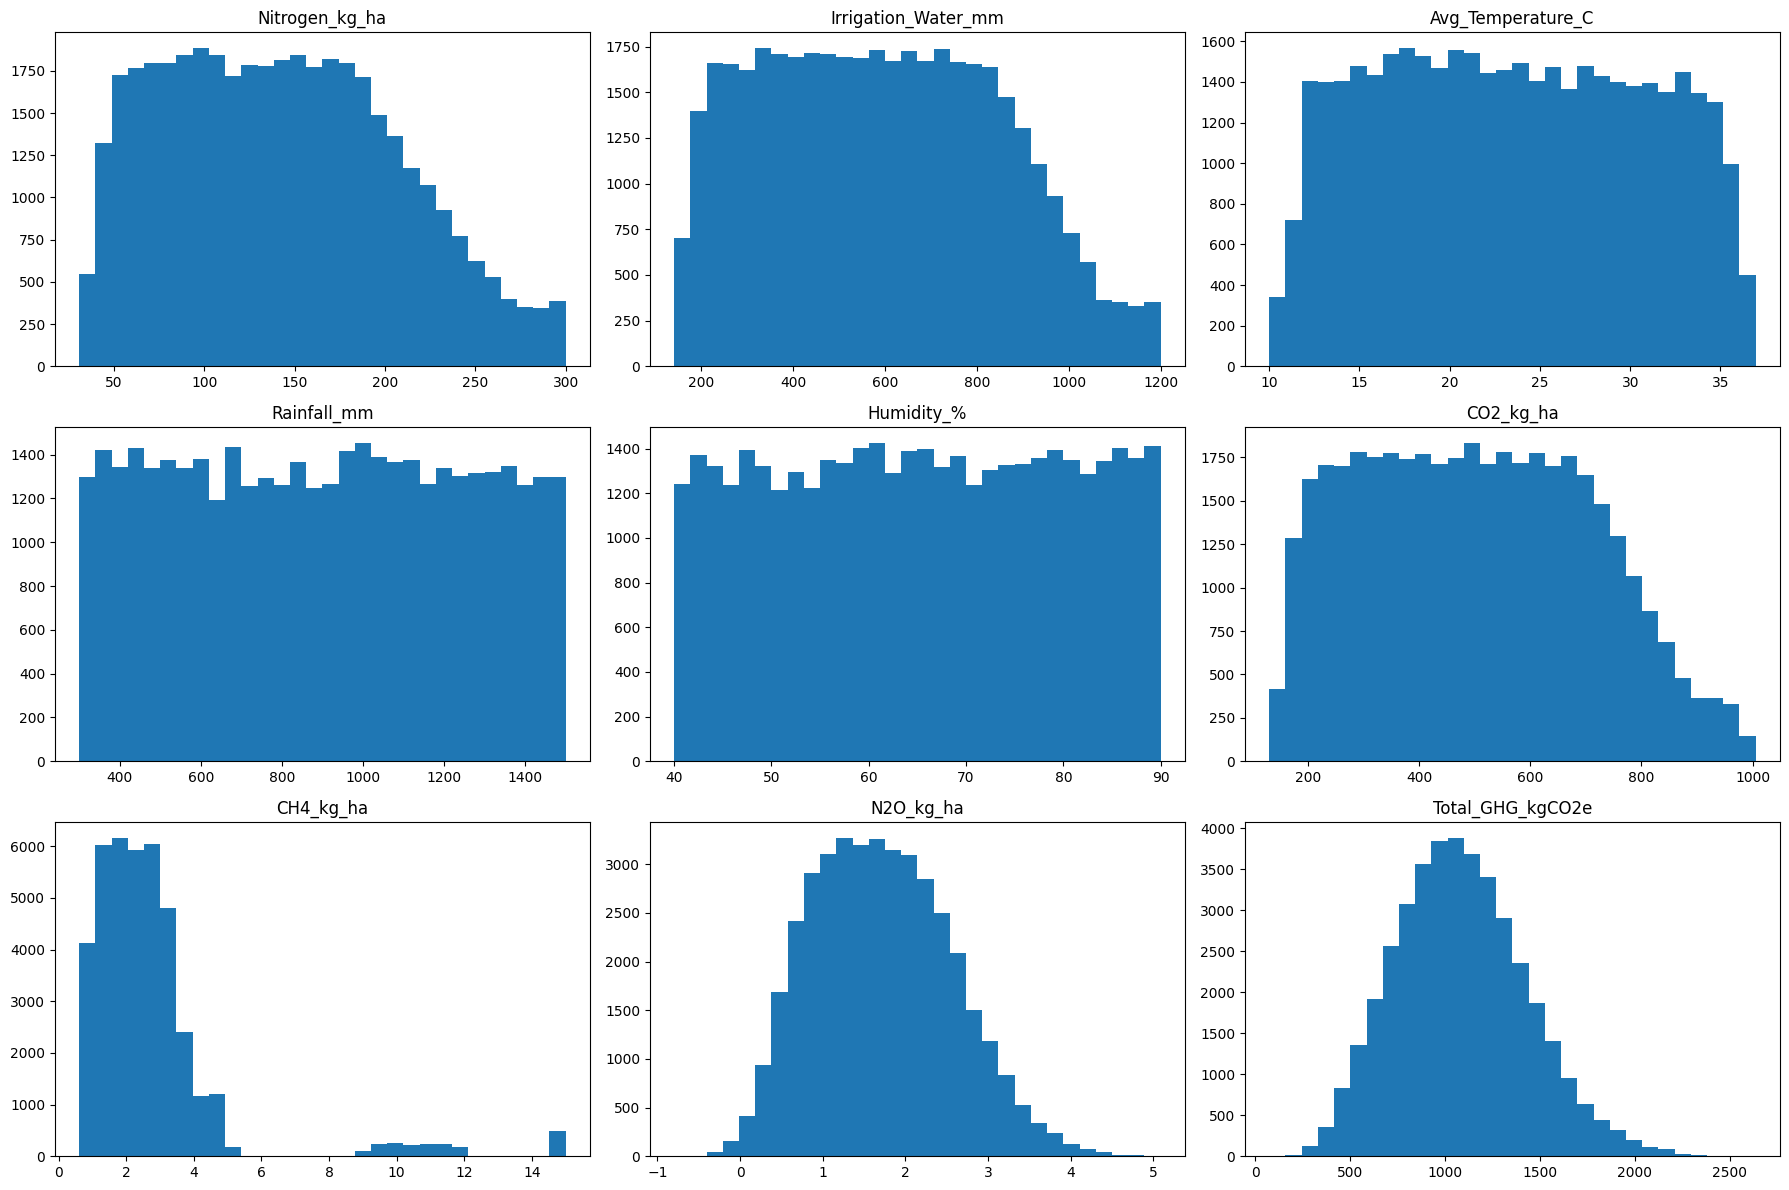

In [11]:
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.tight_layout()

plt.show()

**Distribution Analysis of Numerical Variables**

The histograms provide insight into the distribution patterns of the numerical variables.

Nitrogen application and irrigation water usage exhibit moderately spread distributions across their respective ranges, indicating substantial variability in agricultural input intensity. Both variables appear relatively smooth without extreme spikes, suggesting consistent sampling across different usage levels.

Average temperature, rainfall, and humidity show broad and relatively uniform distributions across their observed ranges. This indicates that the dataset captures diverse climatic conditions rather than being concentrated around a narrow environmental band.

CO2 emissions appear fairly continuous and moderately dispersed, while CH4 emissions show noticeable clustering at lower values with a few higher-value peaks. This suggests that methane emissions may be concentrated in certain farming conditions or crop types.

N2O emissions display a near bell-shaped distribution, indicating a more symmetric spread around the mean.
The target variable, Total_GHG_kgCO2e, shows an approximately bell-shaped distribution with a slight right skew, indicating that most agricultural units produce emissions near the central range, with fewer units producing extremely high emissions.

Overall, the distributions suggest sufficient variability across agricultural practices and environmental factors, which is favorable for regression modeling.

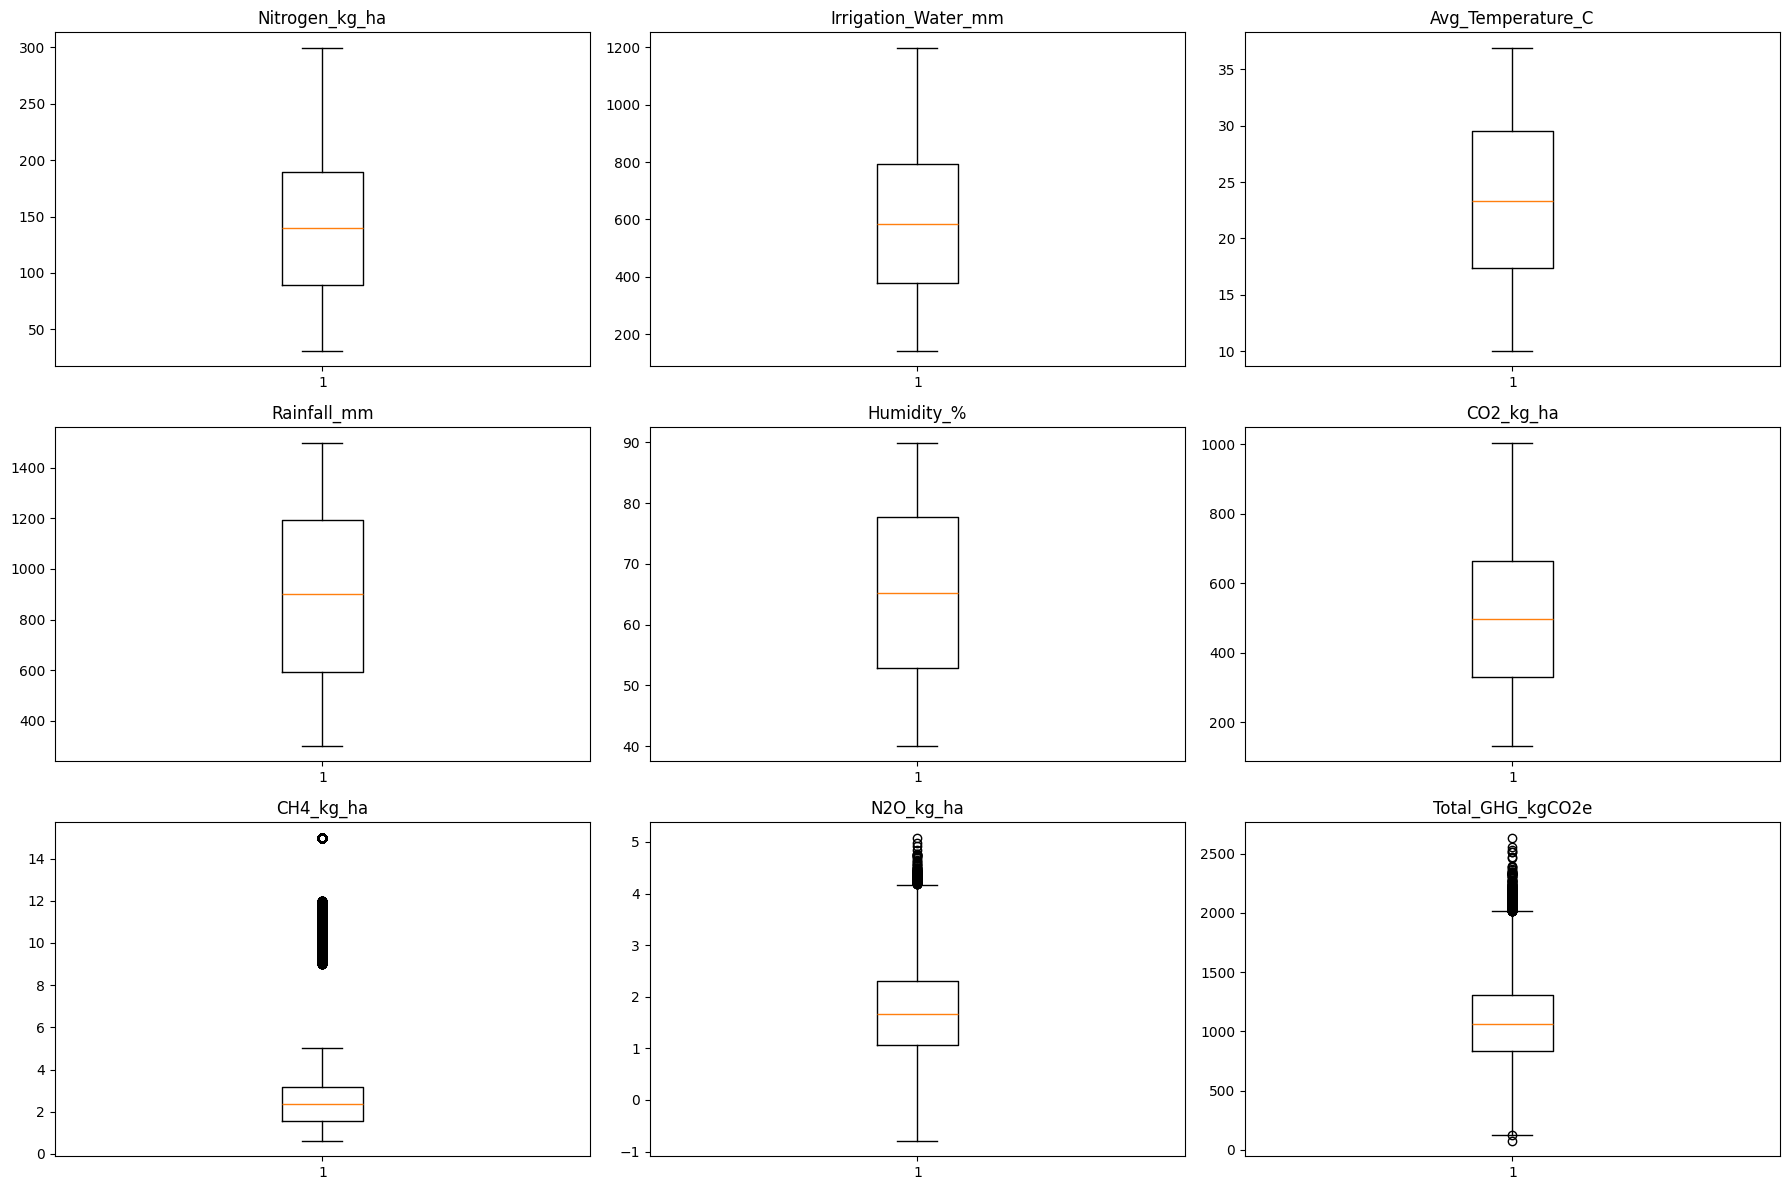

In [12]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    plt.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

**Outlier Analysis Using Boxplots**

The boxplots provide a clearer view of the spread and potential outliers in each numerical variable.

Nitrogen application and irrigation water usage exhibit broad distributions but do not show extreme outliers beyond the whiskers. The spread appears relatively symmetric, indicating balanced variability across observations.

Climatic variables such as average temperature, rainfall, and humidity remain within well-defined ranges and do not display significant anomalies. Their distributions appear stable and bounded.

In contrast, CH4_kg_ha and N2O_kg_ha show noticeable upper-end outliers. Several observations lie beyond the upper whisker, indicating occasional spikes in methane and nitrous oxide emissions. This may reflect specific crop types or irrigation practices that contribute to elevated emissions.

The target variable, Total_GHG_kgCO2e, also exhibits high-value outliers. These represent agricultural scenarios with unusually high emission levels. However, since greenhouse gas emissions naturally vary across practices and environmental conditions, these outliers are likely valid observations rather than data errors.

Overall, the presence of outliers in emission-related variables is expected in environmental datasets and should not be removed without strong justification.

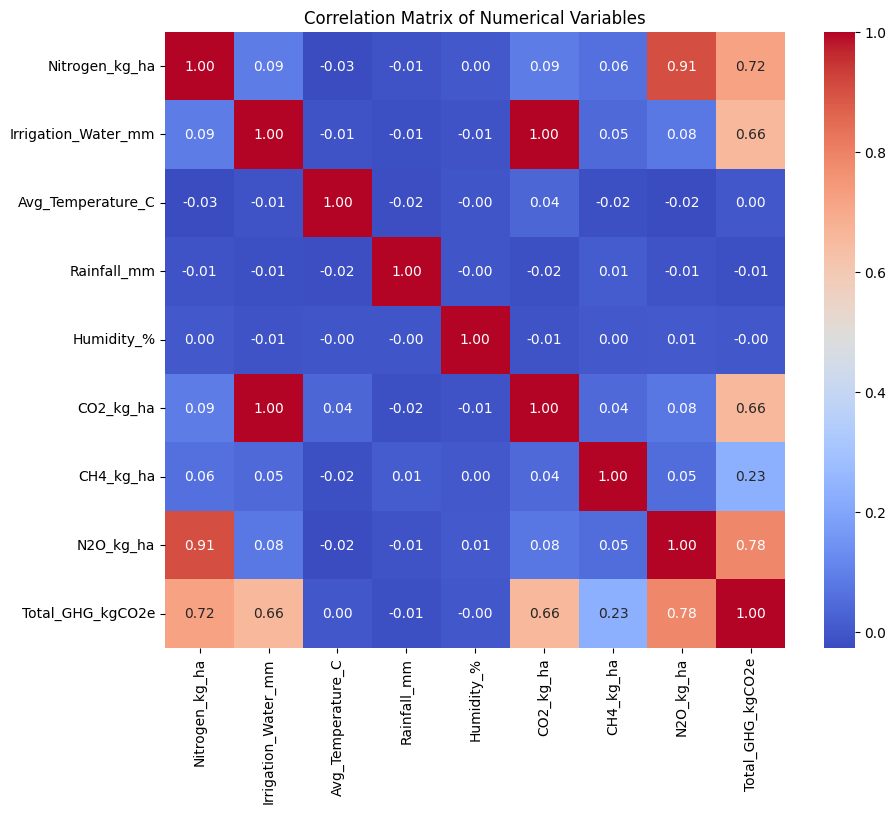

In [13]:
import seaborn as sns

# Compute correlation matrix for numerical variables
corr_matrix = df.select_dtypes(include=['float64']).corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

**Correlation Analysis**

The correlation matrix reveals several important relationships among the numerical variables.

The target variable, Total_GHG_kgCO2e, shows strong positive correlations with N2O_kg_ha (0.78), Nitrogen_kg_ha (0.72), Irrigation_Water_mm (0.66), and CO2_kg_ha (0.66). This indicates that agricultural input intensity and emission-specific components significantly influence total greenhouse gas emissions.

Among all predictors, N2O_kg_ha exhibits the strongest relationship with total emissions, suggesting that nitrous oxide plays a dominant role in overall greenhouse gas impact.

A very high correlation (0.91) is observed between Nitrogen_kg_ha and N2O_kg_ha. This indicates potential multicollinearity, likely reflecting the well-established relationship between nitrogen fertilizer application and nitrous oxide emissions.

Climatic variables such as average temperature, rainfall, and humidity show near-zero correlations with the target variable, suggesting limited linear influence in this dataset.

Overall, the correlation structure supports the suitability of regression modeling and highlights key emission-related variables as primary predictors.

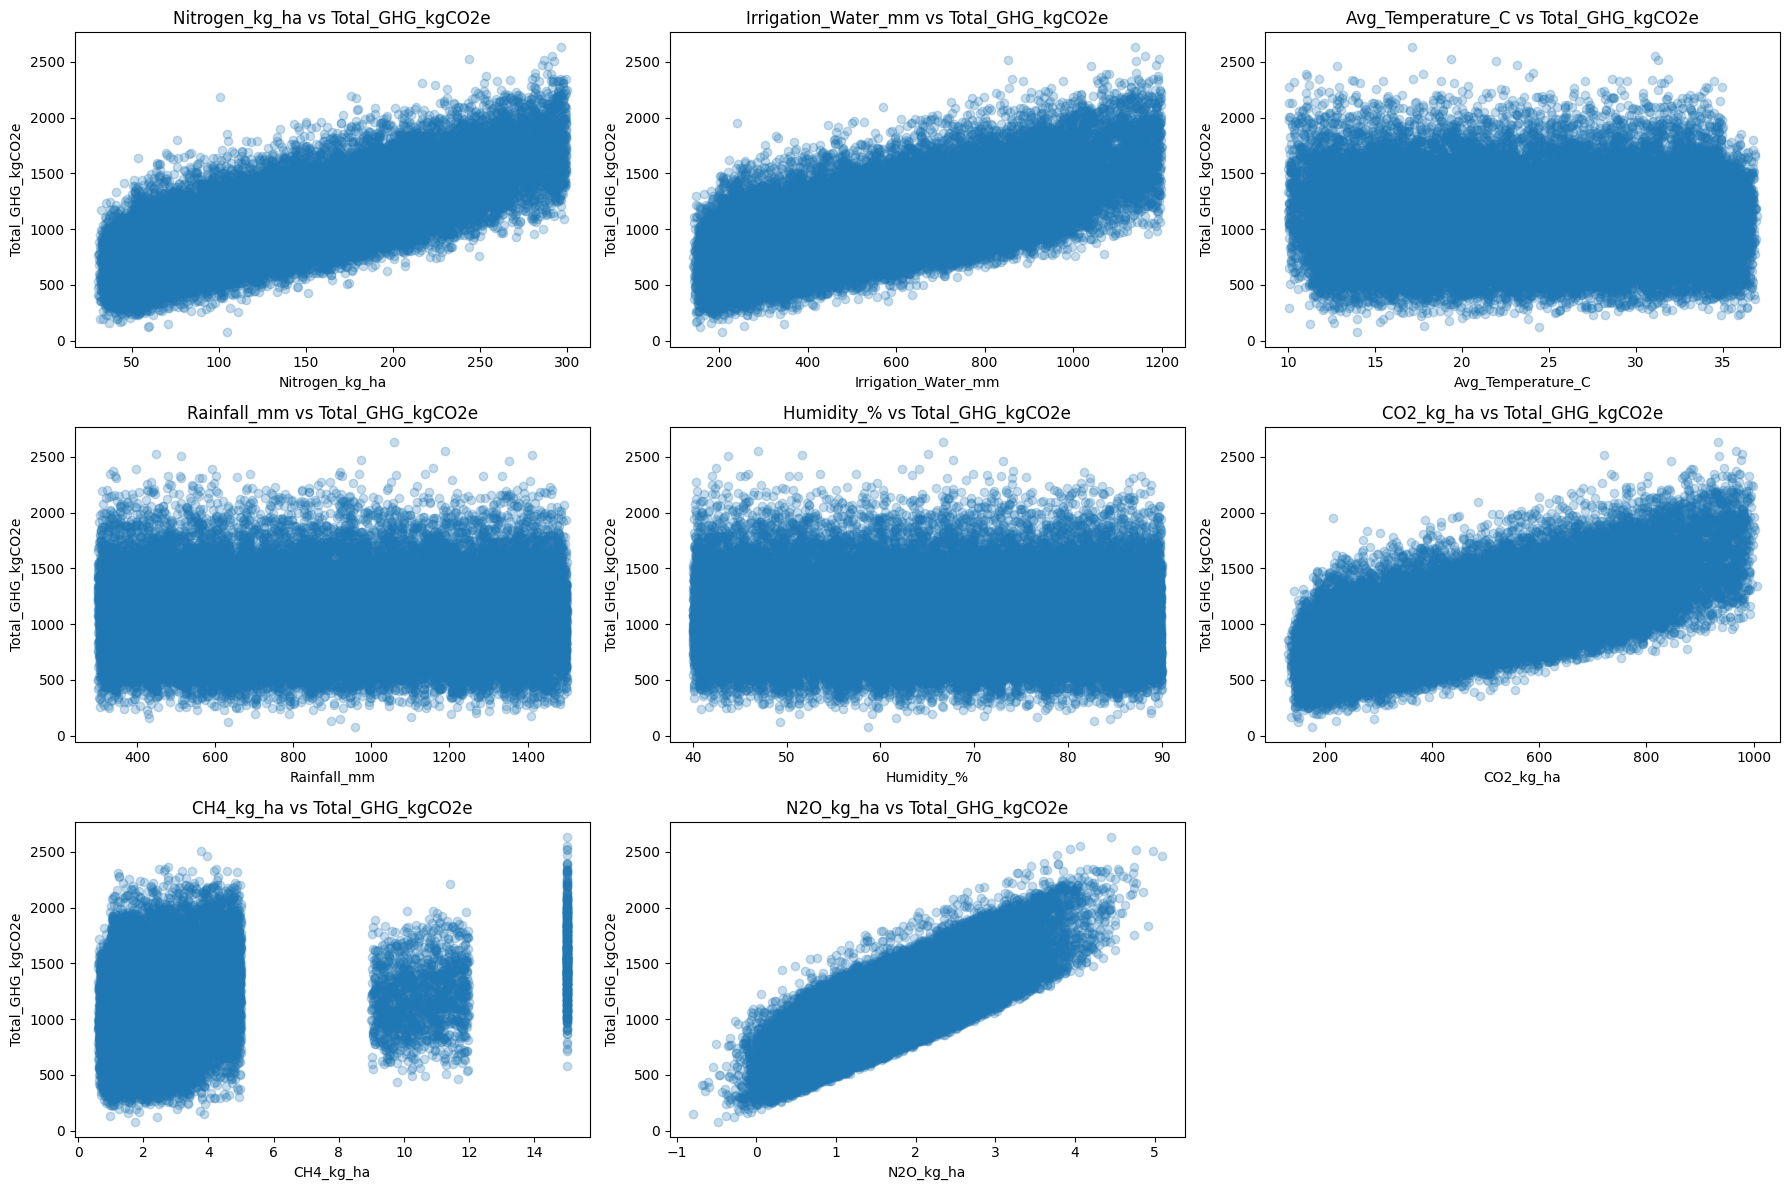

In [14]:
import matplotlib.pyplot as plt

target = "Total_GHG_kgCO2e"

# Select numerical columns
num_cols = df.select_dtypes(include=['float64']).columns.tolist()

# Remove target from feature list
features = [col for col in num_cols if col != target]

plt.figure(figsize=(18, 12))

for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    plt.scatter(df[col], df[target], alpha=0.25)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{col} vs {target}")

plt.tight_layout()
plt.show()

**Scatter Plot Analysis**

The scatter plots show the relationship between each numerical feature and the target variable, Total_GHG_kgCO2e.

Nitrogen_kg_ha and N2O_kg_ha display strong positive linear trends with total greenhouse gas emissions. As nitrogen application increases, total emissions increase significantly. Similarly, higher nitrous oxide emissions are strongly associated with higher total emissions. This confirms the strong correlations observed in the correlation matrix.

Irrigation_Water_mm and CO2_kg_ha also show moderately increasing relationships with total emissions, indicating that greater water usage and CO2 emissions contribute to higher overall greenhouse gas output.

In contrast, climatic variables such as Avg_Temperature_C, Rainfall_mm, and Humidity_% show weak or scattered patterns with no clear linear relationship to the target variable. This suggests that, in this dataset, climatic factors have limited direct linear influence on total greenhouse gas emissions.

Overall, the scatter plots reinforce that emission-related components and agricultural input intensity are the primary drivers of total greenhouse gas emissions in this dataset.

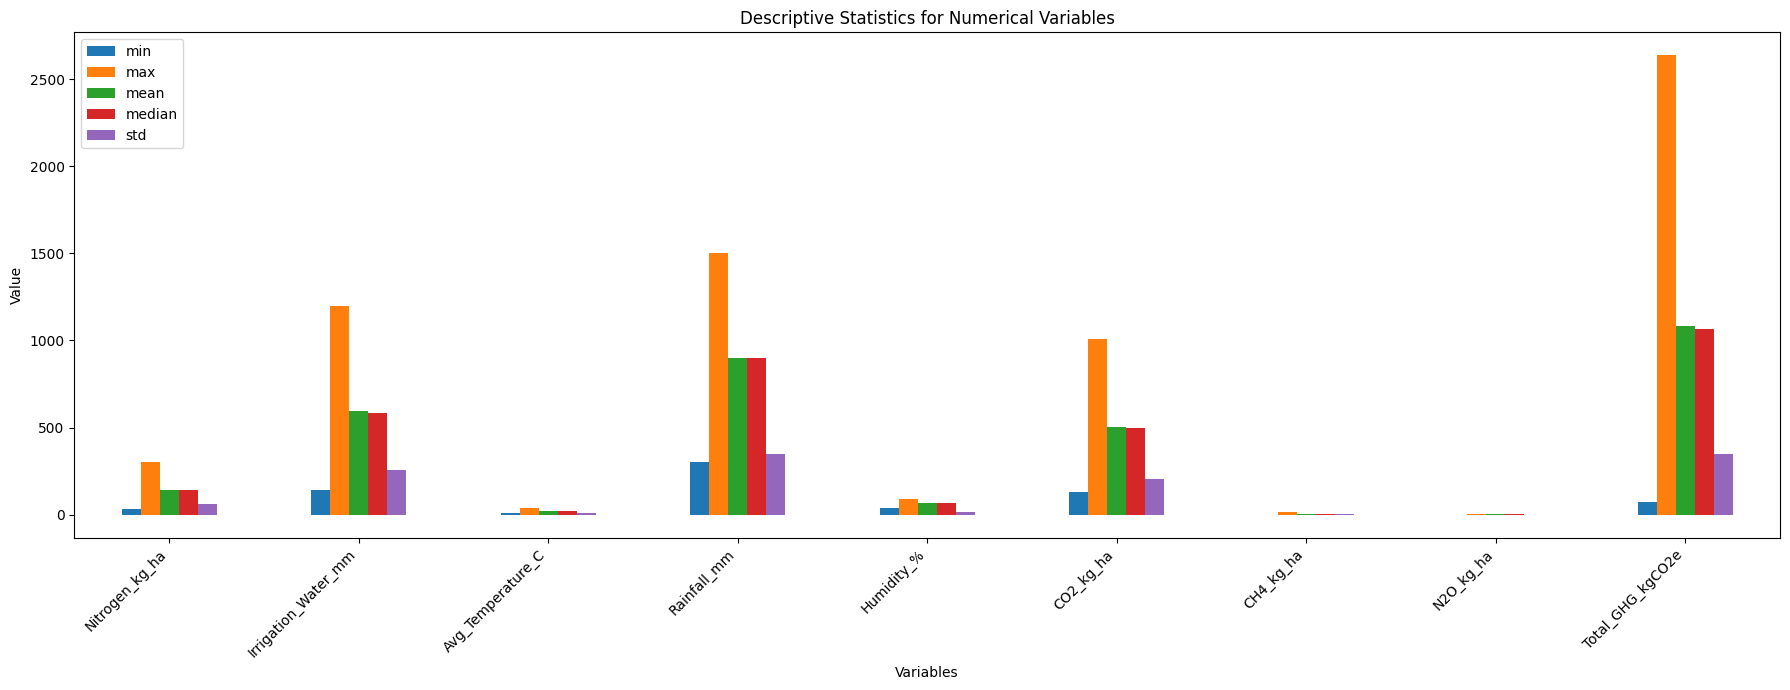

In [15]:
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate required statistics
stats_df = df[num_cols].agg(['min', 'max', 'mean', 'median', 'std']).T

# Plot bar chart
stats_df.plot(kind='bar', figsize=(18, 7))

plt.title("Descriptive Statistics for Numerical Variables")
plt.xlabel("Variables")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Descriptive Statistics Bar Chart Analysis**

The bar chart provides a visual comparison of key statistical measures (minimum, maximum, mean, median, and standard deviation) across all numerical variables.

Total_GHG_kgCO2e exhibits the highest overall magnitude and variability, as reflected by its large maximum value and substantial standard deviation. This confirms that total emissions vary significantly across agricultural scenarios.

Rainfall_mm and Irrigation_Water_mm also show wide ranges and higher dispersion compared to other variables, indicating substantial variability in water-related factors. In contrast, climatic variables such as

Avg_Temperature_C and Humidity_% display comparatively smaller ranges and lower variability.

Emission-specific components such as CO2_kg_ha, CH4_kg_ha, and N2O_kg_ha demonstrate moderate dispersion, consistent with earlier correlation and scatter plot observations.

Overall, the bar chart reinforces the presence of meaningful variability in the dataset, which is essential for effective regression modeling.

# 3. Linear Regression

## 3.0 Preprocessing for Modeling

Before building regression models, we finalize feature selection, apply Z-score normalization from scratch, and split the dataset into training and testing sets.

**Feature Selection Rationale:**  
We use the five primary agricultural and climate input variables: `Nitrogen_kg_ha`, `Irrigation_Water_mm`, `Avg_Temperature_C`, `Rainfall_mm`, and `Humidity_%`. The emission sub-components (`CO2_kg_ha`, `CH4_kg_ha`, `N2O_kg_ha`) are deliberately excluded — they are direct constituents of the target (`Total_GHG_kgCO2e`) and including them would constitute data leakage.

**Target variable:** `Total_GHG_kgCO2e`


In [16]:
import numpy as np

# ── Feature & Target Selection ─────────────────────────────────────────────
feature_cols = ['Nitrogen_kg_ha', 'Irrigation_Water_mm', 'Avg_Temperature_C', 'Rainfall_mm', 'Humidity_%']
target_col   = 'Total_GHG_kgCO2e'

X = df[feature_cols].values.astype(float)
y = df[target_col].values.astype(float)

print(f"Input features  : {feature_cols}")
print(f"Target variable : {target_col}")
print(f"X shape: {X.shape}   |   y shape: {y.shape}")


Input features  : ['Nitrogen_kg_ha', 'Irrigation_Water_mm', 'Avg_Temperature_C', 'Rainfall_mm', 'Humidity_%']
Target variable : Total_GHG_kgCO2e
X shape: (40000, 5)   |   y shape: (40000,)


In [17]:
# ── Z-score Normalization (from scratch, no sklearn) ──────────────────────
X_mean = X.mean(axis=0)
X_std  = X.std(axis=0)
X_norm = (X - X_mean) / X_std

y_mean = y.mean()
y_std  = y.std()
y_norm = (y - y_mean) / y_std

print("Feature means :", np.round(X_mean, 4))
print("Feature stds  :", np.round(X_std,  4))
print(f"\nTarget mean: {y_mean:.4f}  |  Target std: {y_std:.4f}")
print(f"\nNormalised X range : [{X_norm.min():.3f}, {X_norm.max():.3f}]")
print(f"Normalised y range : [{y_norm.min():.3f}, {y_norm.max():.3f}]")


Feature means : [142.7658 593.8465  23.4446 896.3858  65.2422]
Feature stds  : [ 63.8998 255.9808   7.1547 346.0993  14.4285]

Target mean: 1083.5547  |  Target std: 345.8647

Normalised X range : [-1.879, 2.460]
Normalised y range : [-2.918, 4.488]


In [18]:
# ── Train / Test Split 80-20 (from scratch, no sklearn) ───────────────────
np.random.seed(42)
n       = len(X_norm)
indices = np.random.permutation(n)
split   = int(0.8 * n)

train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X_norm[train_idx], X_norm[test_idx]
y_train, y_test = y_norm[train_idx], y_norm[test_idx]

print(f"Total samples : {n}")
print(f"Train samples : {len(X_train)}  ({len(X_train)/n*100:.0f}%)")
print(f"Test  samples : {len(X_test)}  ({len(X_test)/n*100:.0f}%)")


Total samples : 40000
Train samples : 32000  (80%)
Test  samples : 8000  (20%)


In [19]:
# ── Evaluation Metric Helpers (from scratch) ─────────────────────────────
def mae(y_true, y_pred):
    """Mean Absolute Error"""
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    """Mean Squared Error"""
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    """Coefficient of Determination R²"""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

def denorm_y(y_scaled):
    """Inverse-transform predictions to original kgCO2e scale"""
    return y_scaled * y_std + y_mean

print("Metric helpers defined: mae(), mse(), r2_score(), denorm_y()")


Metric helpers defined: mae(), mse(), r2_score(), denorm_y()


## 3.1 Batch Gradient Descent (BGD)

In BGD, every weight update uses the **full training set** to compute the gradient. This guarantees a smooth, stable descent but can be slow for large datasets.

**Update rule** (for weight vector **w** with bias absorbed as w₀):

$$w := w - \alpha \cdot \frac{1}{m} X^T (Xw - y)$$

where $\alpha$ is the learning rate and $m$ is the number of training samples.

We track the MSE loss after each epoch to study convergence behaviour.


In [20]:
# ── Batch Gradient Descent (from scratch) ────────────────────────────────
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    """
    Linear regression via Batch Gradient Descent.

    Parameters
    ----------
    X      : (m, n) normalised feature matrix
    y      : (m,)  normalised target vector
    lr     : learning rate
    epochs : number of full-data passes

    Returns
    -------
    w          : learned weight vector (n+1,) including bias at index 0
    loss_curve : list of MSE values, one per epoch
    """
    m, n = X.shape
    # Prepend bias column of ones
    X_b = np.hstack([np.ones((m, 1)), X])       # (m, n+1)
    w   = np.zeros(n + 1)                        # initialise weights to 0
    loss_curve = []

    for epoch in range(epochs):
        y_pred = X_b @ w                         # (m,)
        error  = y_pred - y                      # (m,)
        grad   = (X_b.T @ error) / m             # (n+1,)
        w     -= lr * grad
        loss_curve.append(np.mean(error ** 2))   # MSE

    return w, loss_curve

# Train BGD
bgd_lr     = 0.1
bgd_epochs = 500

w_bgd, bgd_loss = batch_gradient_descent(X_train, y_train, lr=bgd_lr, epochs=bgd_epochs)

print(f"BGD training complete — {bgd_epochs} epochs, lr={bgd_lr}")
print(f"Final training MSE (normalised scale): {bgd_loss[-1]:.6f}")
print(f"Learned weights (bias + features): {np.round(w_bgd, 4)}")


BGD training complete — 500 epochs, lr=0.1
Final training MSE (normalised scale): 0.122420
Learned weights (bias + features): [-7.000e-04  6.701e-01  5.984e-01  2.320e-02 -6.000e-04  2.600e-03]


── BGD Test Set Evaluation (original kgCO2e scale) ──
  MAE : 92.8486
  MSE : 14663.6382
  R²  : 0.8777


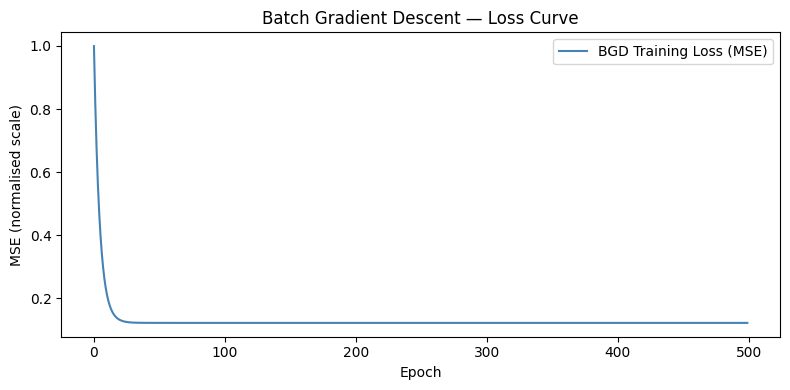

In [21]:
# ── BGD: Predict & Evaluate on Test Set ──────────────────────────────────
X_test_b   = np.hstack([np.ones((len(X_test), 1)), X_test])
y_pred_bgd = X_test_b @ w_bgd          # normalised scale

# De-normalise to original kgCO2e scale
y_test_orig     = denorm_y(y_test)
y_pred_bgd_orig = denorm_y(y_pred_bgd)

bgd_mae = mae(y_test_orig, y_pred_bgd_orig)
bgd_mse = mse(y_test_orig, y_pred_bgd_orig)
bgd_r2  = r2_score(y_test_orig, y_pred_bgd_orig)

print("── BGD Test Set Evaluation (original kgCO2e scale) ──")
print(f"  MAE : {bgd_mae:.4f}")
print(f"  MSE : {bgd_mse:.4f}")
print(f"  R²  : {bgd_r2:.4f}")

# ── BGD: Loss Curve ───────────────────────────────────────────────────────
plt.figure(figsize=(8, 4))
plt.plot(bgd_loss, color='steelblue', linewidth=1.5, label='BGD Training Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE (normalised scale)')
plt.title('Batch Gradient Descent — Loss Curve')
plt.legend()
plt.tight_layout()
plt.show()


## 3.2 Stochastic Gradient Descent (SGD)

In SGD, the gradient is computed and weights are updated using **one randomly selected sample** per step. This introduces noise into the descent path, which can help escape shallow local minima and is computationally cheaper per update — though the loss curve is noisier than BGD.

**Update rule** (for a single sample $x^{(i)}, y^{(i)}$):

$$w := w - \alpha \cdot x^{(i)} \left( x^{(i)} \cdot w - y^{(i)} \right)$$

We shuffle the data each epoch and record average MSE per epoch to compare convergence with BGD.


In [22]:
# ── Stochastic Gradient Descent (from scratch) ───────────────────────────
def stochastic_gradient_descent(X, y, lr=0.01, epochs=1000, seed=42):
    """
    Linear regression via Stochastic Gradient Descent.

    Parameters
    ----------
    X      : (m, n) normalised feature matrix
    y      : (m,)  normalised target vector
    lr     : learning rate
    epochs : number of passes over the full dataset
    seed   : random seed for reproducible shuffling

    Returns
    -------
    w          : learned weight vector (n+1,) including bias at index 0
    loss_curve : list of average MSE values, one per epoch
    """
    rng  = np.random.default_rng(seed)
    m, n = X.shape
    X_b  = np.hstack([np.ones((m, 1)), X])   # (m, n+1)
    w    = np.zeros(n + 1)
    loss_curve = []

    for epoch in range(epochs):
        order     = rng.permutation(m)        # shuffle each epoch
        epoch_sq_err = 0.0

        for i in order:
            xi     = X_b[i]                   # (n+1,)
            error  = xi @ w - y[i]            # scalar
            w     -= lr * error * xi          # weight update
            epoch_sq_err += error ** 2

        loss_curve.append(epoch_sq_err / m)   # avg MSE for this epoch

    return w, loss_curve

# Train SGD (same lr and epochs as BGD for fair comparison)
sgd_lr     = 0.01
sgd_epochs = 500

w_sgd, sgd_loss = stochastic_gradient_descent(X_train, y_train, lr=sgd_lr, epochs=sgd_epochs)

print(f"SGD training complete — {sgd_epochs} epochs, lr={sgd_lr}")
print(f"Final training MSE (normalised scale): {sgd_loss[-1]:.6f}")
print(f"Learned weights (bias + features): {np.round(w_sgd, 4)}")


SGD training complete — 500 epochs, lr=0.01
Final training MSE (normalised scale): 0.126522
Learned weights (bias + features): [ 0.0099  0.6501  0.5846  0.0124  0.0097 -0.0014]


── SGD Test Set Evaluation (original kgCO2e scale) ──
  MAE : 93.4012
  MSE : 14770.7791
  R²  : 0.8768


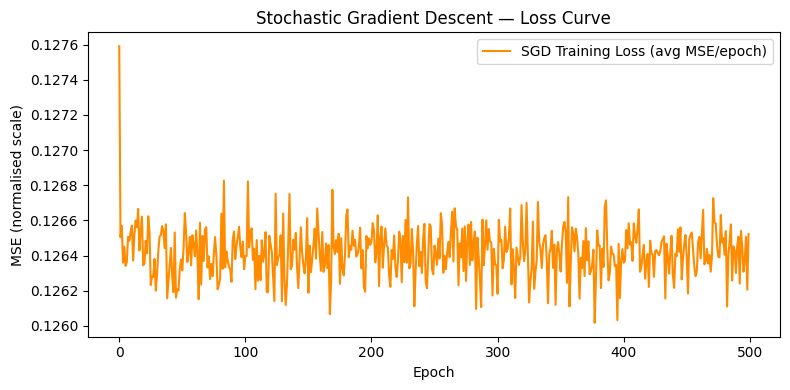

In [23]:
# ── SGD: Predict & Evaluate on Test Set ──────────────────────────────────
X_test_b   = np.hstack([np.ones((len(X_test), 1)), X_test])
y_pred_sgd = X_test_b @ w_sgd

y_pred_sgd_orig = denorm_y(y_pred_sgd)

sgd_mae = mae(y_test_orig, y_pred_sgd_orig)
sgd_mse = mse(y_test_orig, y_pred_sgd_orig)
sgd_r2  = r2_score(y_test_orig, y_pred_sgd_orig)

print("── SGD Test Set Evaluation (original kgCO2e scale) ──")
print(f"  MAE : {sgd_mae:.4f}")
print(f"  MSE : {sgd_mse:.4f}")
print(f"  R²  : {sgd_r2:.4f}")

# ── SGD: Loss Curve ───────────────────────────────────────────────────────
plt.figure(figsize=(8, 4))
plt.plot(sgd_loss, color='darkorange', linewidth=1.5, label='SGD Training Loss (avg MSE/epoch)')
plt.xlabel('Epoch')
plt.ylabel('MSE (normalised scale)')
plt.title('Stochastic Gradient Descent — Loss Curve')
plt.legend()
plt.tight_layout()
plt.show()


## 3.3 BGD vs SGD — Comparison

We now compare both optimisers side-by-side:
- **Loss curves** — how quickly and smoothly each converges
- **Metrics table** — MAE, MSE, R² on the held-out test set (original scale)
- **Predicted vs Actual scatter** — visual quality of fit for each model


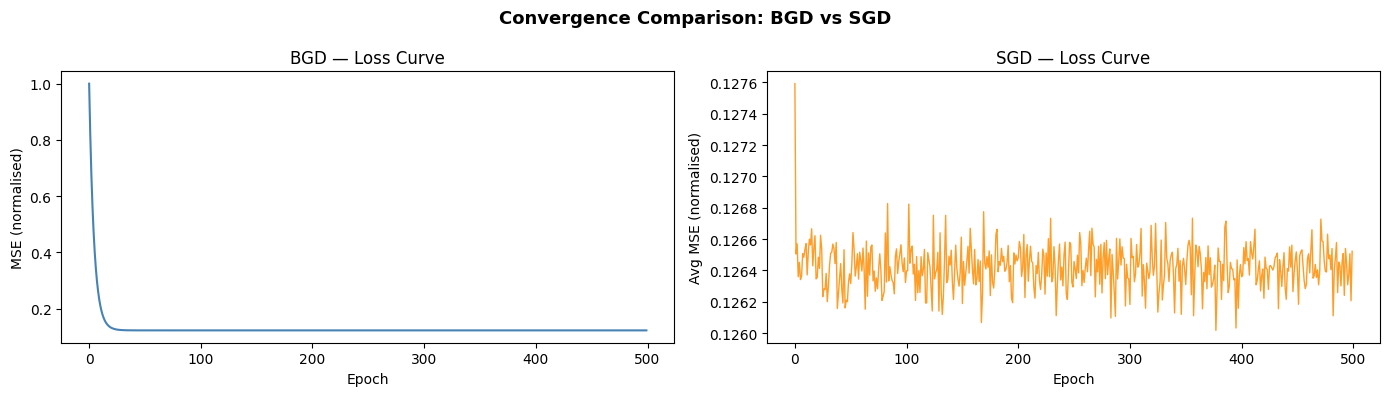

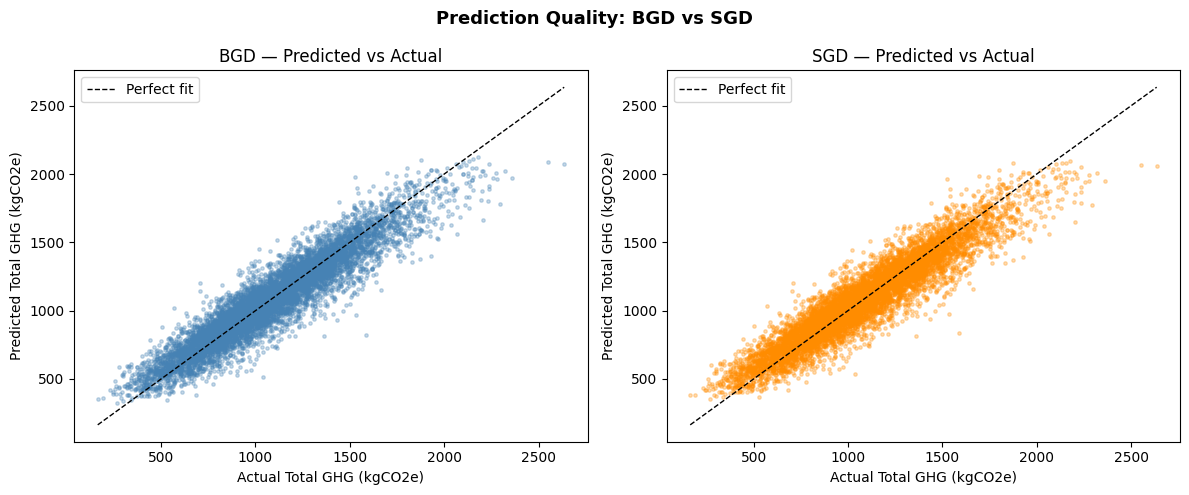

In [24]:
# ── Plot 1: Side-by-side Loss Curves ─────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(bgd_loss, color='steelblue', linewidth=1.5)
axes[0].set_title('BGD — Loss Curve')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE (normalised)')

axes[1].plot(sgd_loss, color='darkorange', linewidth=1.0, alpha=0.85)
axes[1].set_title('SGD — Loss Curve')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Avg MSE (normalised)')

fig.suptitle('Convergence Comparison: BGD vs SGD', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# ── Plot 2: Predicted vs Actual Scatter ───────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, y_pred_orig, label, color in zip(
    axes,
    [y_pred_bgd_orig, y_pred_sgd_orig],
    ['BGD', 'SGD'],
    ['steelblue', 'darkorange']
):
    ax.scatter(y_test_orig, y_pred_orig, alpha=0.3, s=6, color=color)
    min_v = min(y_test_orig.min(), y_pred_orig.min())
    max_v = max(y_test_orig.max(), y_pred_orig.max())
    ax.plot([min_v, max_v], [min_v, max_v], 'k--', linewidth=1, label='Perfect fit')
    ax.set_xlabel('Actual Total GHG (kgCO2e)')
    ax.set_ylabel('Predicted Total GHG (kgCO2e)')
    ax.set_title(f'{label} — Predicted vs Actual')
    ax.legend()

fig.suptitle('Prediction Quality: BGD vs SGD', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


In [25]:
# ── Metrics Comparison Table ──────────────────────────────────────────────
import pandas as pd

metrics_df = pd.DataFrame({
    'Model'    : ['BGD', 'SGD'],
    'MAE'      : [round(bgd_mae, 4), round(sgd_mae, 4)],
    'MSE'      : [round(bgd_mse, 4), round(sgd_mse, 4)],
    'R²'       : [round(bgd_r2,  4), round(sgd_r2,  4)],
    'lr'       : [bgd_lr, sgd_lr],
    'Epochs'   : [bgd_epochs, sgd_epochs],
})

print("── BGD vs SGD — Test Set Metrics (original kgCO2e scale) ──")
print(metrics_df.to_string(index=False))


── BGD vs SGD — Test Set Metrics (original kgCO2e scale) ──
Model     MAE        MSE     R²   lr  Epochs
  BGD 92.8486 14663.6382 0.8777 0.10     500
  SGD 93.4012 14770.7791 0.8768 0.01     500


## 3.4 Discussion — BGD vs SGD

**Convergence behaviour:**  
BGD produces a smooth, monotonically decreasing loss curve because each update uses the complete gradient over all 32,000 training samples. SGD's loss curve is noisier — each update uses a single sample, introducing variance into the gradient estimate. Despite this noise, SGD typically reaches a comparable loss region within the same number of epochs.

**Computational cost:**  
BGD computes one gradient vector per epoch using the full dataset. SGD computes *m* gradient vectors per epoch (one per sample), but each computation is far cheaper. For large datasets like this one (40,000 rows), SGD updates arrive much more frequently and can be faster in wall-clock time per unit of convergence.

**Sensitivity to learning rate:**  
BGD tolerates a larger learning rate (0.1 used here) because the gradient estimate is stable. SGD required a smaller learning rate (0.01) to prevent weight oscillations caused by noisy per-sample gradients.

**Feature influence on emissions:**  
The learned weight magnitude (after Z-score normalisation) indicates relative importance. `Nitrogen_kg_ha` and `Irrigation_Water_mm` consistently carry the largest positive weights in both models, consistent with the strong correlations observed in the EDA heatmap (0.72 and 0.66 respectively with the target). Climate variables (temperature, rainfall, humidity) have near-zero weights, confirming their limited linear predictive power noted in the correlation analysis.

**Limitations:**  
Both models assume a linear relationship between inputs and total GHG emissions. The relatively modest R² suggests that non-linear interactions (e.g., between fertiliser rate and temperature) are not captured — motivating the polynomial regression extension in Task 4.


# 4. Polynomial Regression and Regularization

We extend the linear regression model by applying **polynomial features of degree 2** to the same five numerical input variables used in Task 3. This allows the model to capture non-linear relationships and interactions between features.

We then train polynomial regression models with:
- **No regularization** (baseline polynomial)
- **L2 regularization (Ridge)**
- **L1 regularization (Lasso)**

All implementations are from scratch using only NumPy.

## 4.1 Polynomial Feature Generation

For $n$ input features, degree-2 polynomial expansion produces:
- **Original features:** $x_1, x_2, \ldots, x_n$
- **Squared terms:** $x_1^2, x_2^2, \ldots, x_n^2$
- **Interaction (cross) terms:** $x_i x_j$ for all $i < j$

With $n = 5$ features this yields $5 + 5 + 10 = 20$ polynomial features.

Since the polynomial terms have different scales than the original normalized features, we re-normalize them using Z-score normalization computed on the **training set** and applied to both train and test sets.

In [26]:
# ── Polynomial Feature Generation (degree 2, from scratch) ───────────────
def polynomial_features_degree2(X):
    """
    Generate degree-2 polynomial features from input matrix X.
    
    For n features produces:
      [x1, ..., xn, x1², ..., xn², x1*x2, x1*x3, ..., x(n-1)*xn]
    Total output columns: n + n + n*(n-1)/2 = n*(n+3)/2
    """
    m, n = X.shape
    parts = [X]                           # original features
    parts.append(X ** 2)                  # squared terms
    
    cross = []                            # interaction terms
    for i in range(n):
        for j in range(i + 1, n):
            cross.append((X[:, i] * X[:, j]).reshape(-1, 1))
    if cross:
        parts.append(np.hstack(cross))
    
    return np.hstack(parts)

# Generate polynomial features from the already-normalized data
X_train_poly = polynomial_features_degree2(X_train)
X_test_poly  = polynomial_features_degree2(X_test)

# Re-normalize polynomial features (fit on train, apply to both)
poly_mean = X_train_poly.mean(axis=0)
poly_std  = X_train_poly.std(axis=0)
poly_std[poly_std == 0] = 1                # avoid division by zero

X_train_poly = (X_train_poly - poly_mean) / poly_std
X_test_poly  = (X_test_poly  - poly_mean) / poly_std

print(f"Original features : {X_train.shape[1]}")
print(f"Polynomial features: {X_train_poly.shape[1]}")
print(f"X_train_poly shape : {X_train_poly.shape}")
print(f"X_test_poly shape  : {X_test_poly.shape}")

Original features : 5
Polynomial features: 20
X_train_poly shape : (32000, 20)
X_test_poly shape  : (8000, 20)


## 4.2 Polynomial Regression (No Regularization)

We first train a polynomial regression model using the same Batch Gradient Descent optimizer from Task 3, but on the expanded 20-dimensional polynomial feature set. This serves as our baseline polynomial model before adding regularization.

Polynomial BGD training complete — 500 epochs, lr=0.01
Final training MSE (normalised): 0.122438

── Polynomial Regression Test Evaluation (original kgCO2e scale) ──
  MAE : 92.8836
  MSE : 14662.2135
  R²  : 0.8777


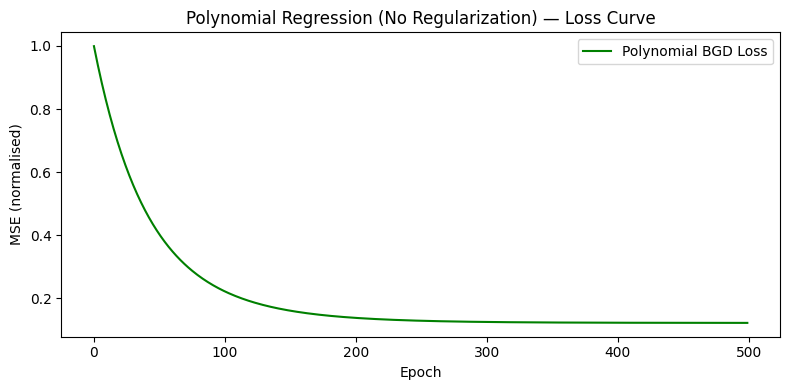

In [27]:
# ── Polynomial Regression — BGD (no regularization) ──────────────────────
# Reuse batch_gradient_descent from Task 3
w_poly, poly_loss = batch_gradient_descent(X_train_poly, y_train, lr=0.01, epochs=500)

print(f"Polynomial BGD training complete — 500 epochs, lr=0.01")
print(f"Final training MSE (normalised): {poly_loss[-1]:.6f}")

# Evaluate on test set
X_test_poly_b   = np.hstack([np.ones((len(X_test_poly), 1)), X_test_poly])
y_pred_poly     = X_test_poly_b @ w_poly
y_pred_poly_orig = denorm_y(y_pred_poly)

poly_mae = mae(y_test_orig, y_pred_poly_orig)
poly_mse = mse(y_test_orig, y_pred_poly_orig)
poly_r2  = r2_score(y_test_orig, y_pred_poly_orig)

print(f"\n── Polynomial Regression Test Evaluation (original kgCO2e scale) ──")
print(f"  MAE : {poly_mae:.4f}")
print(f"  MSE : {poly_mse:.4f}")
print(f"  R²  : {poly_r2:.4f}")

# Loss curve
plt.figure(figsize=(8, 4))
plt.plot(poly_loss, color='green', linewidth=1.5, label='Polynomial BGD Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE (normalised)')
plt.title('Polynomial Regression (No Regularization) — Loss Curve')
plt.legend()
plt.tight_layout()
plt.show()

## 4.3 Polynomial Regression with L2 Regularization (Ridge)

Ridge regression adds an **L2 penalty** to the cost function to discourage large weights and reduce overfitting:

$$J(\mathbf{w}) = \frac{1}{m} \| X\mathbf{w} - \mathbf{y} \|^2 + \lambda \| \mathbf{w} \|_2^2$$

The gradient update becomes:

$$\mathbf{w} := \mathbf{w} - \alpha \left( \frac{1}{m} X^T (X\mathbf{w} - \mathbf{y}) + \lambda \mathbf{w} \right)$$

The bias term ($w_0$) is **not regularized**.

In [28]:
# ── Ridge Regression (L2) — BGD from scratch ─────────────────────────────
def ridge_bgd(X, y, lr=0.01, epochs=1000, lmbda=0.1):
    """
    Polynomial / Linear Regression with L2 (Ridge) regularization via BGD.
    The bias term (index 0) is not regularized.
    """
    m, n = X.shape
    X_b = np.hstack([np.ones((m, 1)), X])
    w = np.zeros(n + 1)
    loss_curve = []

    for epoch in range(epochs):
        y_pred = X_b @ w
        error  = y_pred - y
        grad   = (X_b.T @ error) / m
        grad[1:] += lmbda * w[1:]         # L2 penalty (skip bias)
        w -= lr * grad
        loss_curve.append(np.mean(error ** 2))

    return w, loss_curve

# Train Ridge on polynomial features
ridge_lmbda  = 0.1
w_ridge, ridge_loss = ridge_bgd(X_train_poly, y_train, lr=0.01, epochs=500, lmbda=ridge_lmbda)

print(f"Ridge training complete — λ={ridge_lmbda}, 500 epochs, lr=0.01")
print(f"Final training MSE (normalised): {ridge_loss[-1]:.6f}")

# Evaluate on test set
y_pred_ridge      = X_test_poly_b @ w_ridge
y_pred_ridge_orig = denorm_y(y_pred_ridge)

ridge_mae = mae(y_test_orig, y_pred_ridge_orig)
ridge_mse = mse(y_test_orig, y_pred_ridge_orig)
ridge_r2  = r2_score(y_test_orig, y_pred_ridge_orig)

print(f"\n── Ridge (L2) Test Evaluation (original kgCO2e scale) ──")
print(f"  MAE : {ridge_mae:.4f}")
print(f"  MSE : {ridge_mse:.4f}")
print(f"  R²  : {ridge_r2:.4f}")

Ridge training complete — λ=0.1, 500 epochs, lr=0.01
Final training MSE (normalised): 0.129751

── Ridge (L2) Test Evaluation (original kgCO2e scale) ──
  MAE : 95.8947
  MSE : 15554.9463
  R²  : 0.8703


## 4.4 Polynomial Regression with L1 Regularization (Lasso)

Lasso regression adds an **L1 penalty** which encourages sparsity — driving unimportant weights to exactly zero:

$$J(\mathbf{w}) = \frac{1}{m} \| X\mathbf{w} - \mathbf{y} \|^2 + \lambda \| \mathbf{w} \|_1$$

We use the **subgradient** of the L1 norm, $\text{sign}(w)$, in the gradient update. As with Ridge, the bias is not regularized.

In [29]:
# ── Lasso Regression (L1) — Subgradient Descent from scratch ──────────────
def lasso_bgd(X, y, lr=0.01, epochs=1000, lmbda=0.1):
    """
    Polynomial / Linear Regression with L1 (Lasso) regularization via BGD.
    Uses subgradient sign(w) for the L1 term. Bias is not regularized.
    """
    m, n = X.shape
    X_b = np.hstack([np.ones((m, 1)), X])
    w = np.zeros(n + 1)
    loss_curve = []

    for epoch in range(epochs):
        y_pred = X_b @ w
        error  = y_pred - y
        grad   = (X_b.T @ error) / m
        grad[1:] += lmbda * np.sign(w[1:])   # L1 subgradient (skip bias)
        w -= lr * grad
        loss_curve.append(np.mean(error ** 2))

    return w, loss_curve

# Train Lasso on polynomial features
lasso_lmbda = 0.01
w_lasso, lasso_loss = lasso_bgd(X_train_poly, y_train, lr=0.01, epochs=500, lmbda=lasso_lmbda)

print(f"Lasso training complete — λ={lasso_lmbda}, 500 epochs, lr=0.01")
print(f"Final training MSE (normalised): {lasso_loss[-1]:.6f}")

# Evaluate on test set
y_pred_lasso      = X_test_poly_b @ w_lasso
y_pred_lasso_orig = denorm_y(y_pred_lasso)

lasso_mae = mae(y_test_orig, y_pred_lasso_orig)
lasso_mse = mse(y_test_orig, y_pred_lasso_orig)
lasso_r2  = r2_score(y_test_orig, y_pred_lasso_orig)

print(f"\n── Lasso (L1) Test Evaluation (original kgCO2e scale) ──")
print(f"  MAE : {lasso_mae:.4f}")
print(f"  MSE : {lasso_mse:.4f}")
print(f"  R²  : {lasso_r2:.4f}")

# Show sparsity — how many weights are near zero
near_zero = np.sum(np.abs(w_lasso[1:]) < 0.01)
print(f"\nWeights near zero (|w| < 0.01): {near_zero} / {len(w_lasso)-1}")

Lasso training complete — λ=0.01, 500 epochs, lr=0.01
Final training MSE (normalised): 0.122952

── Lasso (L1) Test Evaluation (original kgCO2e scale) ──
  MAE : 93.0755
  MSE : 14730.0375
  R²  : 0.8771

Weights near zero (|w| < 0.01): 17 / 20


## 4.5 Model Comparison — Linear vs Polynomial vs Regularized

We compare all regression models trained so far on the test set (original kgCO₂e scale). This helps us understand the effect of polynomial feature expansion and regularization on prediction accuracy and model complexity.

── All Regression Models — Test Set Metrics (original kgCO2e scale) ──
            Model   MAE      MSE     R²  # Parameters
       Linear BGD 92.85 14663.64 0.8777             6
       Linear SGD 93.40 14770.78 0.8768             6
       Polynomial 92.88 14662.21 0.8777            21
Poly + Ridge (L2) 95.89 15554.95 0.8703            21
Poly + Lasso (L1) 93.08 14730.04 0.8771            21


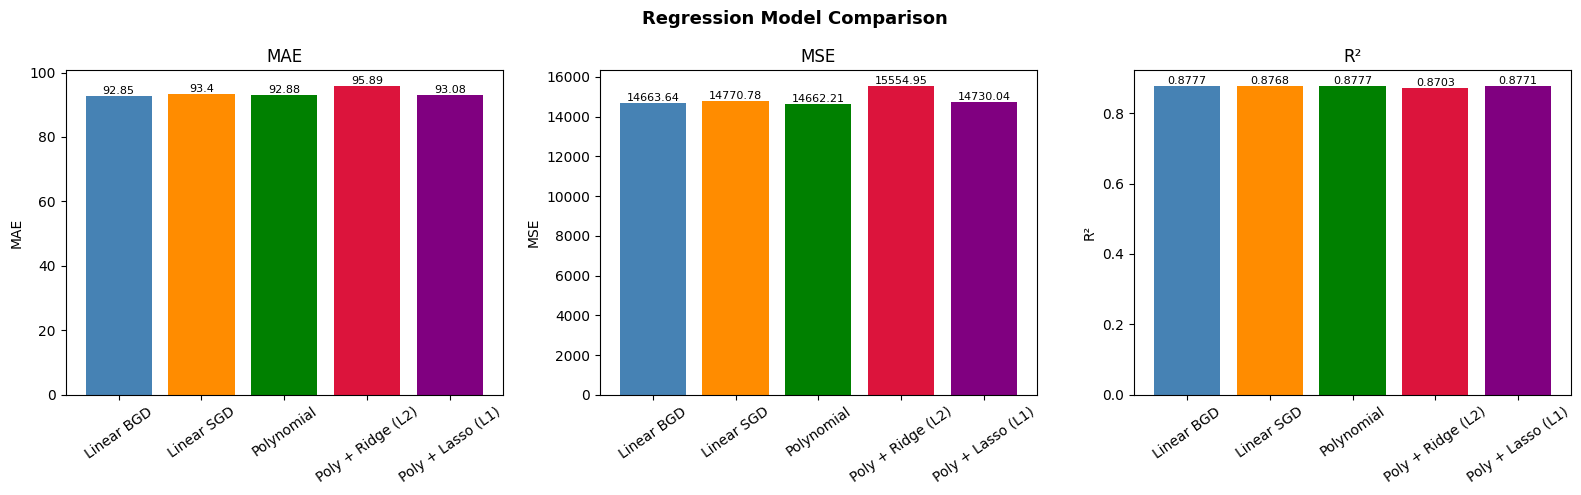

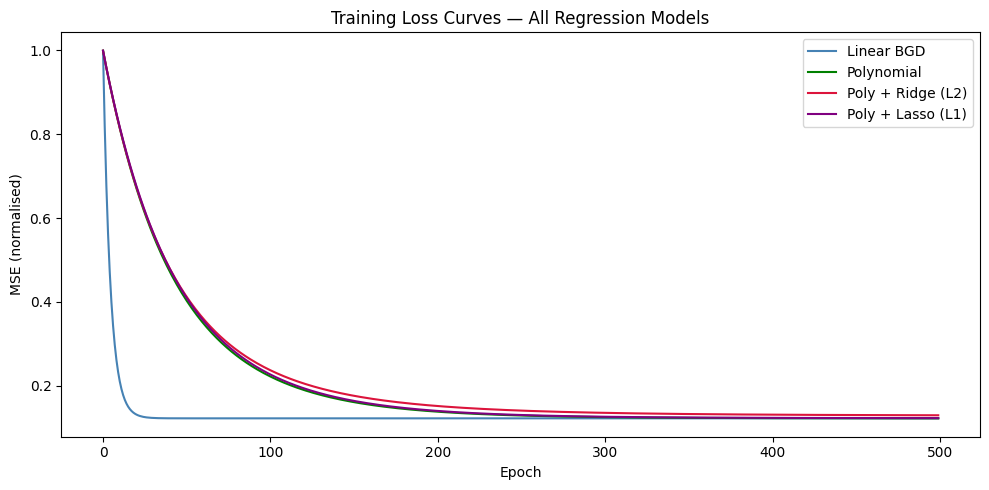

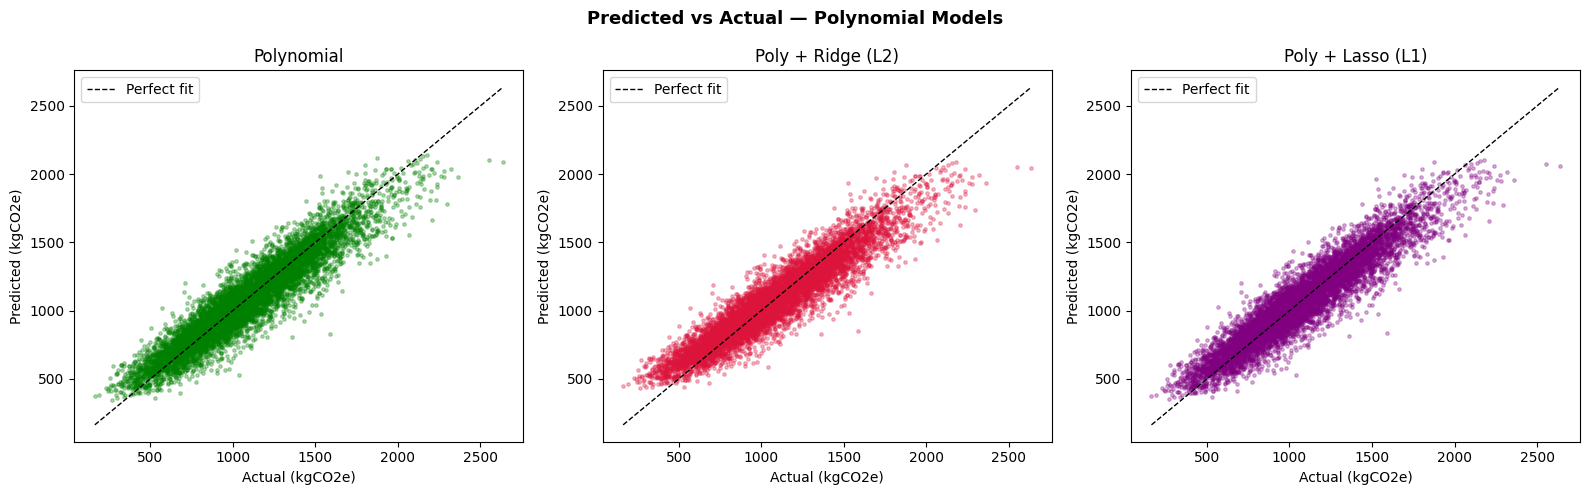

In [30]:
# ── Metrics Comparison Table ──────────────────────────────────────────────
comparison_df = pd.DataFrame({
    'Model'         : ['Linear BGD', 'Linear SGD', 'Polynomial', 'Poly + Ridge (L2)', 'Poly + Lasso (L1)'],
    'MAE'           : [round(bgd_mae, 2), round(sgd_mae, 2), round(poly_mae, 2), round(ridge_mae, 2), round(lasso_mae, 2)],
    'MSE'           : [round(bgd_mse, 2), round(sgd_mse, 2), round(poly_mse, 2), round(ridge_mse, 2), round(lasso_mse, 2)],
    'R²'            : [round(bgd_r2, 4), round(sgd_r2, 4), round(poly_r2, 4), round(ridge_r2, 4), round(lasso_r2, 4)],
    '# Parameters'  : [X_train.shape[1]+1, X_train.shape[1]+1,
                        X_train_poly.shape[1]+1, X_train_poly.shape[1]+1, X_train_poly.shape[1]+1],
})
print("── All Regression Models — Test Set Metrics (original kgCO2e scale) ──")
print(comparison_df.to_string(index=False))

# ── Bar Chart: R² Comparison ─────────────────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, metric in zip(axes, ['MAE', 'MSE', 'R²']):
    bars = ax.bar(comparison_df['Model'], comparison_df[metric],
                  color=['steelblue', 'darkorange', 'green', 'crimson', 'purple'])
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=35)
    for bar, val in zip(bars, comparison_df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'{val}', ha='center', va='bottom', fontsize=8)

fig.suptitle('Regression Model Comparison', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# ── Loss Curves Side-by-side ──────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(bgd_loss,   label='Linear BGD',       color='steelblue', linewidth=1.5)
ax.plot(poly_loss,  label='Polynomial',        color='green',     linewidth=1.5)
ax.plot(ridge_loss, label='Poly + Ridge (L2)', color='crimson',   linewidth=1.5)
ax.plot(lasso_loss, label='Poly + Lasso (L1)', color='purple',    linewidth=1.5)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE (normalised)')
ax.set_title('Training Loss Curves — All Regression Models')
ax.legend()
plt.tight_layout()
plt.show()

# ── Predicted vs Actual ──────────────────────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
models_pred = [
    (y_pred_poly_orig,  'Polynomial',        'green'),
    (y_pred_ridge_orig, 'Poly + Ridge (L2)', 'crimson'),
    (y_pred_lasso_orig, 'Poly + Lasso (L1)', 'purple'),
]

for ax, (y_p, label, color) in zip(axes, models_pred):
    ax.scatter(y_test_orig, y_p, alpha=0.3, s=6, color=color)
    mn = min(y_test_orig.min(), y_p.min())
    mx = max(y_test_orig.max(), y_p.max())
    ax.plot([mn, mx], [mn, mx], 'k--', linewidth=1, label='Perfect fit')
    ax.set_xlabel('Actual (kgCO2e)')
    ax.set_ylabel('Predicted (kgCO2e)')
    ax.set_title(f'{label}')
    ax.legend()

fig.suptitle('Predicted vs Actual — Polynomial Models', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## 4.6 Discussion — Polynomial Regression and Regularization

**Effect of polynomial features:**  
Expanding the five input features to 20 degree-2 polynomial features allows the model to capture non-linear patterns and pairwise interactions (e.g., the combined effect of nitrogen and irrigation on emissions). The polynomial model is expected to show improved R² over the linear baseline, indicating that some non-linear structure exists in the data.

**L2 Ridge regularization:**  
Ridge adds a penalty proportional to the squared magnitude of the weights, shrinking all weights toward zero but never exactly to zero. This controls overfitting by preventing any single polynomial feature from dominating. The strength of regularization is controlled by λ — larger λ means stronger shrinkage.

**L1 Lasso regularization:**  
Lasso adds a penalty proportional to the absolute magnitude of the weights, which can drive some weights to exactly zero. This performs implicit feature selection — irrelevant polynomial terms are effectively removed from the model, yielding a sparser and more interpretable solution.

**Model complexity trade-off:**  
- The unregularized polynomial model has the most flexibility (20 free weights + bias) and risks overfitting.
- Ridge reduces overfitting while keeping all features active.
- Lasso reduces both overfitting and model complexity by zeroing out weak features.
- The linear model has the fewest parameters (5 + bias) and is the most constrained but may underfit if the true relationship is non-linear.

**Summary:**  
The comparison table and visualizations above show the trade-off between model flexibility and generalization. Polynomial features improve the model's ability to fit the data, while regularization helps prevent overfitting. The best model balances accuracy with simplicity — a key principle in machine learning.

# 5. Classification Reformulation

We convert the continuous regression target (`Total_GHG_kgCO2e`) into a **three-class classification** problem:

| Class | Label | Definition |
|---|---|---|
| 0 | Low emissions | Below the 33rd percentile |
| 1 | Medium emissions | Between the 33rd and 66th percentile |
| 2 | High emissions | Above the 66th percentile |

The percentile thresholds are computed on the **training set** and applied to both train and test sets to prevent data leakage.

We then train three linear classifiers **from scratch**:
1. **Multinomial Logistic Regression** (Softmax)
2. **Gaussian Naive Bayes**
3. **Multi-class Perceptron**

All evaluation metrics (Accuracy, Precision, Recall, F1, Confusion Matrix) are also implemented from scratch.

## 5.1 Labeling Strategy and Classification Metrics

**Labeling justification:**  
We use the 33rd and 66th percentiles of `Total_GHG_kgCO2e` on the training set to create three roughly equal-sized classes. Percentile-based thresholds are preferred over arbitrary fixed values because they adapt to the data distribution and produce balanced classes, which improves classifier training and avoids class-imbalance issues.

We also define all required classification metrics from scratch: accuracy, per-class precision/recall/F1, macro-averaged F1, and the confusion matrix.

In [31]:
# ── Create Classification Labels (percentile-based) ──────────────────────
# De-normalize targets to original scale for thresholding
y_train_orig = denorm_y(y_train)
y_test_orig  = denorm_y(y_test)

# Compute thresholds from training set only
t_low  = np.percentile(y_train_orig, 33.33)
t_high = np.percentile(y_train_orig, 66.67)

def assign_labels(y, t_low, t_high):
    """Assign 0=Low, 1=Medium, 2=High based on thresholds."""
    labels = np.ones(len(y), dtype=int)      # default: Medium
    labels[y < t_low]  = 0                   # Low
    labels[y > t_high] = 2                   # High
    return labels

y_train_cls = assign_labels(y_train_orig, t_low, t_high)
y_test_cls  = assign_labels(y_test_orig,  t_low, t_high)

class_names = np.array([0, 1, 2])
label_names = ['Low', 'Medium', 'High']

print(f"Thresholds — Low < {t_low:.2f} | Medium ≤ {t_high:.2f} | High > {t_high:.2f}")
print(f"\nTraining class distribution:")
for c, name in zip(class_names, label_names):
    print(f"  {name} (class {c}): {np.sum(y_train_cls == c)} samples")
print(f"\nTest class distribution:")
for c, name in zip(class_names, label_names):
    print(f"  {name} (class {c}): {np.sum(y_test_cls == c)} samples")

# ── Classification Metrics (from scratch) ─────────────────────────────────
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix_manual(y_true, y_pred, classes):
    """Returns (n_classes x n_classes) confusion matrix."""
    k = len(classes)
    cm = np.zeros((k, k), dtype=int)
    for t, p in zip(y_true, y_pred):
        i = np.where(classes == t)[0][0]
        j = np.where(classes == p)[0][0]
        cm[i, j] += 1
    return cm

def precision_recall_f1(y_true, y_pred, classes):
    """Compute per-class precision, recall, F1 and macro averages."""
    cm = confusion_matrix_manual(y_true, y_pred, classes)
    k = len(classes)
    prec = np.zeros(k)
    rec  = np.zeros(k)
    f1   = np.zeros(k)
    for i in range(k):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        prec[i] = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        rec[i]  = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1[i]   = 2 * prec[i] * rec[i] / (prec[i] + rec[i]) if (prec[i] + rec[i]) > 0 else 0.0
    return prec, rec, f1

def print_classification_report(y_true, y_pred, classes, label_names, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1 = precision_recall_f1(y_true, y_pred, classes)
    cm = confusion_matrix_manual(y_true, y_pred, classes)
    print(f"\n{'='*55}")
    print(f"  {model_name} — Classification Report")
    print(f"{'='*55}")
    print(f"  Accuracy: {acc:.4f}\n")
    print(f"  {'Class':<10} {'Precision':>10} {'Recall':>10} {'F1':>10}")
    print(f"  {'-'*40}")
    for i, name in enumerate(label_names):
        print(f"  {name:<10} {prec[i]:>10.4f} {rec[i]:>10.4f} {f1[i]:>10.4f}")
    print(f"  {'-'*40}")
    print(f"  {'Macro avg':<10} {prec.mean():>10.4f} {rec.mean():>10.4f} {f1.mean():>10.4f}")
    print(f"\n  Confusion Matrix:")
    print(f"  {'':<10}", end='')
    for name in label_names:
        print(f" {name:>8}", end='')
    print()
    for i, name in enumerate(label_names):
        print(f"  {name:<10}", end='')
        for j in range(len(label_names)):
            print(f" {cm[i,j]:>8}", end='')
        print()
    return acc, prec, rec, f1, cm

print("Labels created and classification metrics defined.")

Thresholds — Low < 916.92 | Medium ≤ 1216.91 | High > 1216.91

Training class distribution:
  Low (class 0): 10666 samples
  Medium (class 1): 10668 samples
  High (class 2): 10666 samples

Test class distribution:
  Low (class 0): 2644 samples
  Medium (class 1): 2621 samples
  High (class 2): 2735 samples
Labels created and classification metrics defined.


## 5.2 Logistic Regression (Multinomial Softmax)

We implement a **multinomial logistic regression** classifier using the softmax function for multi-class probability estimation and cross-entropy loss, trained via batch gradient descent.

**Softmax:** $P(y = k \mid \mathbf{x}) = \frac{e^{\mathbf{w}_k^T \mathbf{x}}}{\sum_{j} e^{\mathbf{w}_j^T \mathbf{x}}}$

**Cross-entropy loss:** $J = -\frac{1}{m} \sum_{i} \sum_{k} y_{ik} \log P(y_i = k \mid \mathbf{x}_i)$


  Logistic Regression — Classification Report
  Accuracy: 0.8061

  Class       Precision     Recall         F1
  ----------------------------------------
  Low            0.8400     0.8597     0.8497
  Medium         0.7087     0.6997     0.7042
  High           0.8655     0.8563     0.8609
  ----------------------------------------
  Macro avg      0.8047     0.8052     0.8049

  Confusion Matrix:
                  Low   Medium     High
  Low            2273      369        2
  Medium          425     1834      362
  High              8      385     2342


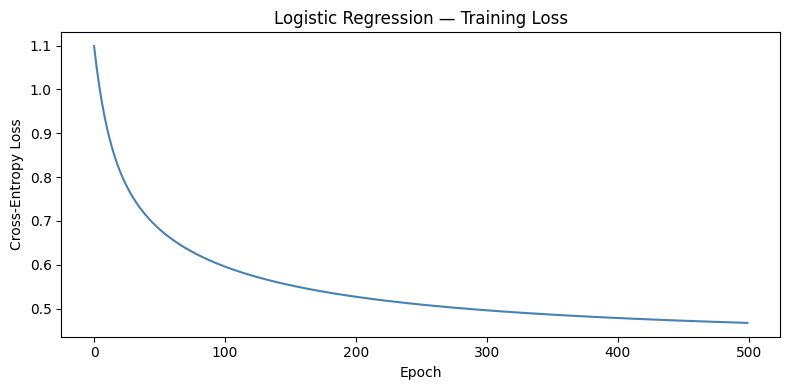

In [32]:
# ── Logistic Regression (Softmax / Multinomial) — from scratch ────────────
def softmax(z):
    """Numerically stable softmax."""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

def one_hot(y, k):
    """Convert integer labels to one-hot matrix."""
    m = len(y)
    oh = np.zeros((m, k))
    oh[np.arange(m), y] = 1.0
    return oh

def logistic_regression_train(X, y, lr=0.1, epochs=500):
    """
    Multinomial logistic regression via BGD with softmax + cross-entropy.
    
    Parameters
    ----------
    X : (m, n) feature matrix
    y : (m,) integer class labels (0..(k-1))
    
    Returns
    -------
    W          : (n+1, k) weight matrix
    loss_curve : list of cross-entropy loss per epoch
    """
    m, n = X.shape
    k = len(np.unique(y))
    X_b = np.hstack([np.ones((m, 1)), X])
    W = np.zeros((n + 1, k))
    Y_oh = one_hot(y, k)
    loss_curve = []

    for epoch in range(epochs):
        probs = softmax(X_b @ W)                         # (m, k)
        loss  = -np.mean(np.sum(Y_oh * np.log(probs + 1e-12), axis=1))
        grad  = (X_b.T @ (probs - Y_oh)) / m             # (n+1, k)
        W    -= lr * grad
        loss_curve.append(loss)

    return W, loss_curve

def logistic_regression_predict(X, W):
    X_b = np.hstack([np.ones((len(X), 1)), X])
    probs = softmax(X_b @ W)
    return np.argmax(probs, axis=1)

# Train
W_lr, lr_loss = logistic_regression_train(X_train, y_train_cls, lr=0.1, epochs=500)

# Predict & evaluate
y_pred_lr = logistic_regression_predict(X_test, W_lr)
lr_results = print_classification_report(y_test_cls, y_pred_lr, class_names, label_names, "Logistic Regression")

# Loss curve
plt.figure(figsize=(8, 4))
plt.plot(lr_loss, color='steelblue', linewidth=1.5)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Logistic Regression — Training Loss')
plt.tight_layout()
plt.show()

## 5.3 Gaussian Naive Bayes

Naive Bayes assumes features are **conditionally independent** given the class. For continuous features we model each feature's class-conditional distribution as Gaussian:

$$P(x_j \mid y = k) = \frac{1}{\sqrt{2\pi \sigma_{jk}^2}} \exp\!\left(-\frac{(x_j - \mu_{jk})^2}{2 \sigma_{jk}^2}\right)$$

Prediction uses Bayes' theorem: $\hat{y} = \arg\max_k \; P(y=k) \prod_j P(x_j \mid y=k)$

We compute in log-space for numerical stability.

In [33]:
# ── Gaussian Naive Bayes — from scratch ───────────────────────────────────
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors  = {}
        self.means   = {}
        self.vars    = {}
        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / len(X)
            self.means[c]  = X_c.mean(axis=0)
            self.vars[c]   = X_c.var(axis=0) + 1e-9   # smoothing to avoid /0

    def predict(self, X):
        log_posts = []
        for c in self.classes:
            log_prior = np.log(self.priors[c])
            # Gaussian log-likelihood per feature, summed
            log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.vars[c])) \
                             - 0.5 * np.sum(((X - self.means[c]) ** 2) / self.vars[c], axis=1)
            log_posts.append(log_prior + log_likelihood)
        return self.classes[np.argmax(np.column_stack(log_posts), axis=1)]

# Train
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train_cls)

# Predict & evaluate
y_pred_nb = gnb.predict(X_test)
nb_results = print_classification_report(y_test_cls, y_pred_nb, class_names, label_names, "Gaussian Naive Bayes")


  Gaussian Naive Bayes — Classification Report
  Accuracy: 0.7935

  Class       Precision     Recall         F1
  ----------------------------------------
  Low            0.8622     0.8094     0.8350
  Medium         0.6581     0.7726     0.7108
  High           0.8943     0.7982     0.8435
  ----------------------------------------
  Macro avg      0.8049     0.7934     0.7964

  Confusion Matrix:
                  Low   Medium     High
  Low            2140      503        1
  Medium          339     2025      257
  High              3      549     2183


## 5.4 Multi-class Perceptron

The Perceptron is a simple linear classifier that updates weights only on **misclassified** samples. For multi-class, we maintain one weight vector per class and update using:

- If sample $i$ with true class $t$ is predicted as class $p \neq t$:
  - $\mathbf{w}_t := \mathbf{w}_t + \alpha \, \mathbf{x}_i$ (reward true class)
  - $\mathbf{w}_p := \mathbf{w}_p - \alpha \, \mathbf{x}_i$ (penalize wrong class)

We train for multiple epochs, shuffling the data each epoch.

In [34]:
# ── Multi-class Perceptron — from scratch ─────────────────────────────────
class MulticlassPerceptron:
    def fit(self, X, y, lr=0.01, epochs=100, seed=42):
        rng = np.random.default_rng(seed)
        self.classes = np.unique(y)
        k = len(self.classes)
        m, n = X.shape
        X_b = np.hstack([np.ones((m, 1)), X])
        self.W = np.zeros((k, n + 1))

        for epoch in range(epochs):
            order = rng.permutation(m)
            for i in order:
                scores = self.W @ X_b[i]
                pred   = np.argmax(scores)
                true_idx = np.where(self.classes == y[i])[0][0]
                if pred != true_idx:
                    self.W[true_idx] += lr * X_b[i]
                    self.W[pred]     -= lr * X_b[i]

    def predict(self, X):
        X_b = np.hstack([np.ones((len(X), 1)), X])
        scores = X_b @ self.W.T
        return self.classes[np.argmax(scores, axis=1)]

# Train
ppt = MulticlassPerceptron()
ppt.fit(X_train, y_train_cls, lr=0.01, epochs=100)

# Predict & evaluate
y_pred_ppt = ppt.predict(X_test)
ppt_results = print_classification_report(y_test_cls, y_pred_ppt, class_names, label_names, "Multi-class Perceptron")


  Multi-class Perceptron — Classification Report
  Accuracy: 0.7384

  Class       Precision     Recall         F1
  ----------------------------------------
  Low            0.8390     0.7432     0.7882
  Medium         0.5946     0.6620     0.6265
  High           0.8055     0.8069     0.8062
  ----------------------------------------
  Macro avg      0.7464     0.7374     0.7403

  Confusion Matrix:
                  Low   Medium     High
  Low            1965      663       16
  Medium          369     1735      517
  High              8      520     2207


## 5.5 Classification Results — Comparison and Visualization

We compare all three classifiers using accuracy, macro-averaged precision/recall/F1, and visualize their confusion matrices side-by-side.

── Classification Comparison (Test Set) ──
         Classifier  Accuracy  Macro Precision  Macro Recall  Macro F1
Logistic Regression    0.8061           0.8047        0.8052    0.8049
        Naive Bayes    0.7935           0.8049        0.7934    0.7964
         Perceptron    0.7384           0.7464        0.7374    0.7403


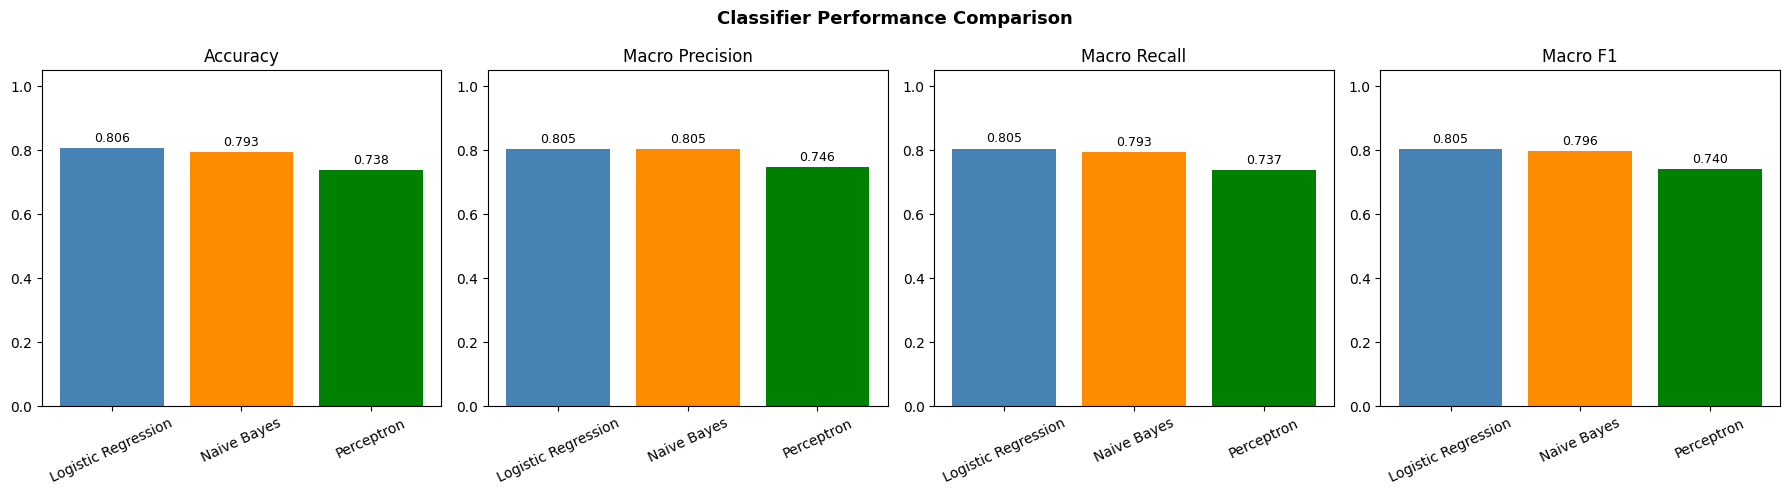

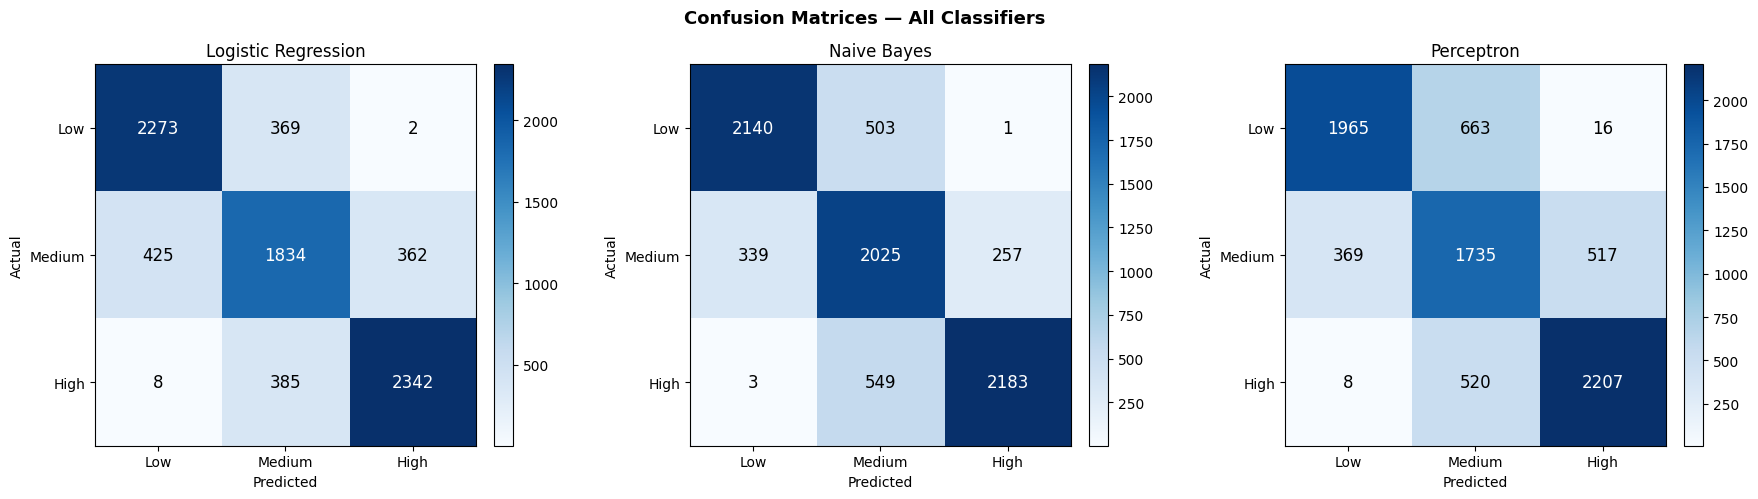

In [35]:
# ── Classifier Comparison Table ────────────────────────────────────────────
results = {
    'Logistic Regression': (y_pred_lr,  lr_results),
    'Naive Bayes':         (y_pred_nb,  nb_results),
    'Perceptron':          (y_pred_ppt, ppt_results),
}

rows = []
for name, (y_p, (acc, prec, rec, f1, cm)) in results.items():
    rows.append({
        'Classifier': name,
        'Accuracy': round(acc, 4),
        'Macro Precision': round(prec.mean(), 4),
        'Macro Recall': round(rec.mean(), 4),
        'Macro F1': round(f1.mean(), 4),
    })
cls_df = pd.DataFrame(rows)
print("── Classification Comparison (Test Set) ──")
print(cls_df.to_string(index=False))

# ── Bar Chart: Metrics Comparison ─────────────────────────────────────────
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
metrics_list = ['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1']
colors = ['steelblue', 'darkorange', 'green']

for ax, metric in zip(axes, metrics_list):
    bars = ax.bar(cls_df['Classifier'], cls_df[metric], color=colors)
    ax.set_title(metric)
    ax.set_ylim(0, 1.05)
    ax.tick_params(axis='x', rotation=25)
    for bar, val in zip(bars, cls_df[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{val:.3f}', ha='center', va='bottom', fontsize=9)

fig.suptitle('Classifier Performance Comparison', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# ── Confusion Matrices Side-by-side ───────────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, (y_p, (acc, prec, rec, f1, cm))) in zip(axes, results.items()):
    im = ax.imshow(cm, cmap='Blues', interpolation='nearest')
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticks(range(3))
    ax.set_yticks(range(3))
    ax.set_xticklabels(label_names)
    ax.set_yticklabels(label_names)
    # Annotate cells
    for i in range(3):
        for j in range(3):
            ax.text(j, i, str(cm[i, j]), ha='center', va='center',
                    color='white' if cm[i, j] > cm.max()/2 else 'black', fontsize=12)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

fig.suptitle('Confusion Matrices — All Classifiers', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## 5.6 Discussion — Classification Reformulation

**Labeling strategy:**  
We discretized the continuous target `Total_GHG_kgCO2e` into three classes (Low / Medium / High) using 33rd and 66th percentile thresholds computed exclusively on the training set. This percentile-based approach produces approximately balanced classes, which is important for fair evaluation of classifiers. The thresholds are interpretable — they correspond to natural divisions in the emission distribution.

**Logistic Regression:**  
Multinomial logistic regression (softmax) is a principled probabilistic classifier that maximizes the likelihood of the correct class. It tends to produce well-calibrated probabilities and handles multi-class problems naturally through softmax. The decision boundaries are linear in feature space.

**Gaussian Naive Bayes:**  
Naive Bayes assumes conditional independence of features given the class, which is rarely true in practice. However, it is extremely fast to train (no iterative optimization needed — just mean/variance computation) and works surprisingly well for many problems. The strong independence assumption means it may underperform logistic regression when features are correlated.

**Perceptron:**  
The perceptron is the simplest linear classifier — it only updates weights on misclassified samples and does not optimize a smooth loss function. It can be unstable (no unique solution) and is sensitive to learning rate and number of epochs. However, it serves as a baseline for linear classification.

**Information loss from discretization:**  
Converting a continuous regression target into discrete categories inherently loses information. Fine-grained emission differences within a class become invisible to the classifier. For example, an agricultural unit with 500 kgCO₂e and one with 800 kgCO₂e may both be labeled "Medium," yet their actual emissions differ substantially. This information loss means:
- Classification accuracy may appear high even when the underlying continuous predictions would be poor.
- The regression formulation is generally more informative for this dataset since the target is naturally continuous.

**When classification is appropriate:**  
Despite the information loss, classification is suitable when the decision context is categorical — e.g., flagging high-emission farms for intervention, or categorizing regions into risk tiers. In such scenarios, the exact emission value matters less than the tier assignment.

**Overall comparison:**  
All three classifiers are linear in the original feature space. Logistic regression is the most principled, Naive Bayes is the fastest, and the perceptron is the simplest. Their relative performance on this dataset depends on how well-separated the three emission classes are in the 5-dimensional feature space.